# Data Analysis & Preprocessing

In [39]:
# Importing Libraries

from autots import AutoTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [17]:
# Load Dataset
df = pd.read_csv('data/Foreign_Exchange_Rates.xls')
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,Unnamed: 24
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,NaN
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,NaN
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,NaN
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,NaN
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,NaN


In [18]:
print("Dataset Shape:", df.shape)
print(df.info())

Dataset Shape: (5217, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 5217 non-null   int64  
 1   Time Serie                                 5217 non-null   object 
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object 
 3   EURO AREA - EURO/US$                       5217 non-null   object 
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object 
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object 
 6   BRAZIL - REAL/US$                          5217 non-null   object 
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object 
 8   CHINA - YUAN/US$                           5217 non-null   object 
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object 
 10

## Cleaning data

In [19]:
df.drop(['Unnamed: 0', 'Unnamed: 24'], axis=1, inplace=True)  # Dropping Unnamed:0 and Unnamed:24 Columns

# Convert timeseeries to datetime
df['Time Serie'] = pd.to_datetime(df['Time Serie'], format='%d-%m-%Y')

# Convert columns to numeric data
obj_cols = df.columns.to_list()
obj_cols.remove('Time Serie')

for col in obj_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')   # If a value is not a number NaN will be returned

df.dropna()   # Drop any rows with null values

# Removing any duplicates
df.drop_duplicates()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5217 non-null   datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64       
 2   EURO AREA - EURO/US$                       5019 non-null   float64       
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   float64       
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64       
 5   BRAZIL - REAL/US$                          5019 non-null   float64       
 6   CANADA - CANADIAN DOLLAR/US$               5019 non-null   float64       
 7   CHINA - YUAN/US$                           5020 non-null   float64       
 8   HONG KONG - HONG KONG DOLLAR/US$           5019 non-null   float64       
 9   INDIA - INDIAN RUPE

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [20]:
df.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5020.000000,5019.000000,5018.000000,...,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5016.000000,5019.000000
mean,2009-12-31 09:36:19.873490688,1.332015,0.843904,1.543683,0.640372,2.547928,1.230338,7.200820,7.782638,52.718519,...,1.480398,6.285997,106.590122,3.650950,7.074850,7.898923,119.111287,1.150461,31.764884,35.519862
min,2000-01-03 00:00:00,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,2004-12-31 00:00:00,1.115200,0.750800,1.323800,0.587400,1.945100,1.055700,6.475775,7.756400,45.250000,...,1.342950,5.592750,100.080000,3.291500,5.996350,6.852350,100.400000,0.966800,30.350000,31.780000
50%,2009-12-31 00:00:00,1.311000,0.815600,1.442400,0.636400,2.328800,1.237000,6.860050,7.780600,48.090000,...,1.408500,6.071700,109.020000,3.800000,6.784000,7.747800,112.300000,1.040400,31.730000,34.000000
75%,2014-12-31 00:00:00,1.430200,0.900100,1.591100,0.692350,3.129900,1.335700,8.276500,7.799800,62.432500,...,1.679150,6.714500,116.815000,3.800000,8.278200,8.743600,132.600000,1.269050,32.980000,39.405000
max,2019-12-31 00:00:00,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000
std,NaN,0.269918,0.126836,0.337318,0.082611,0.724216,0.182160,0.820150,0.027544,9.680986,...,0.188932,0.943508,13.210090,0.378539,1.226937,1.201860,25.342679,0.249052,1.671010,4.563073


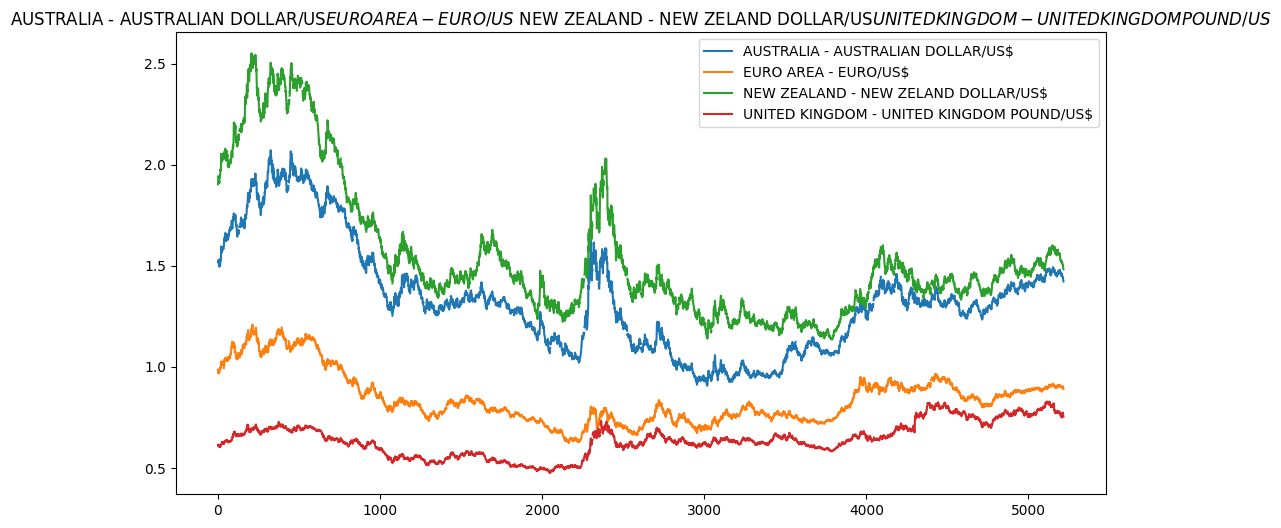

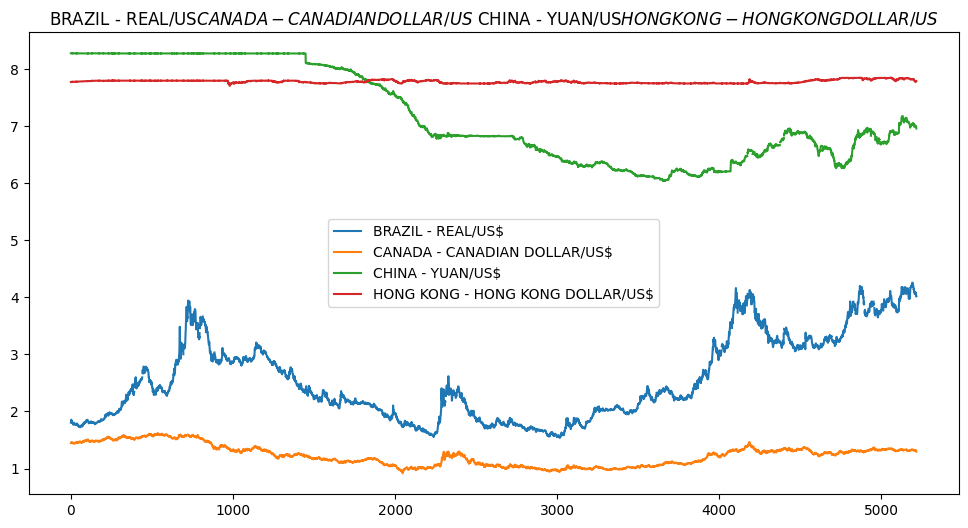

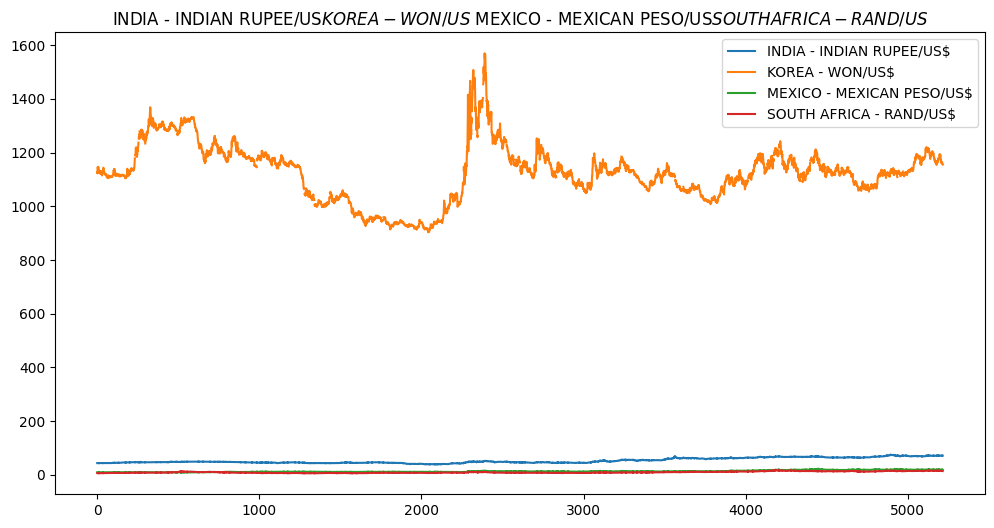

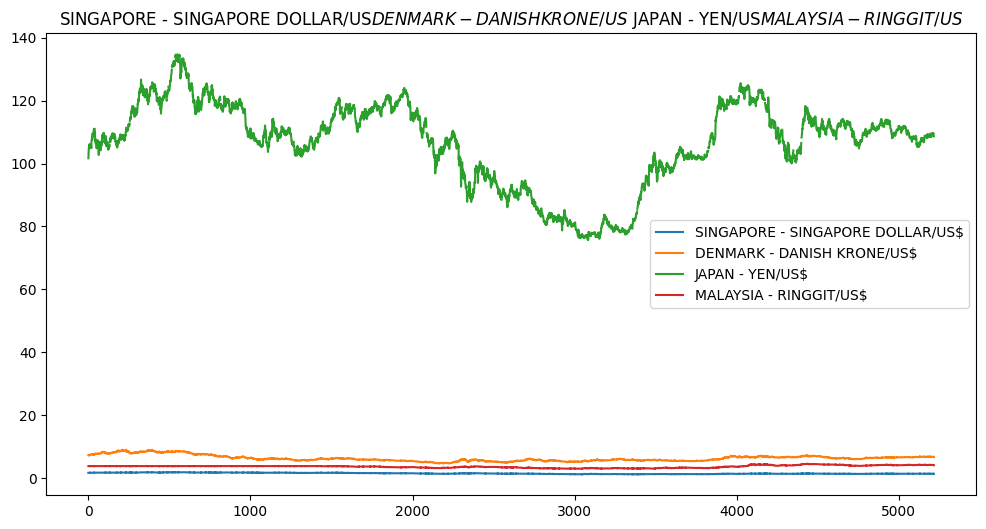

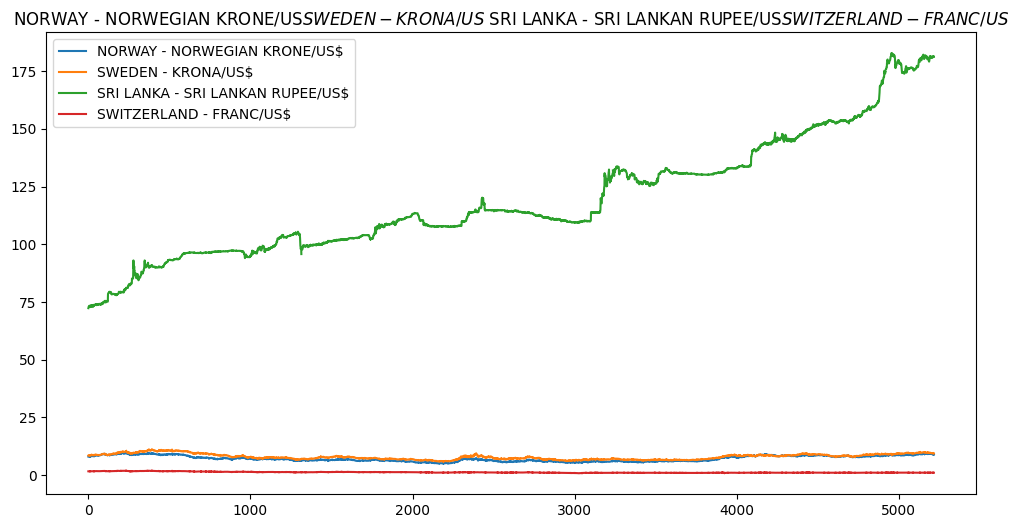

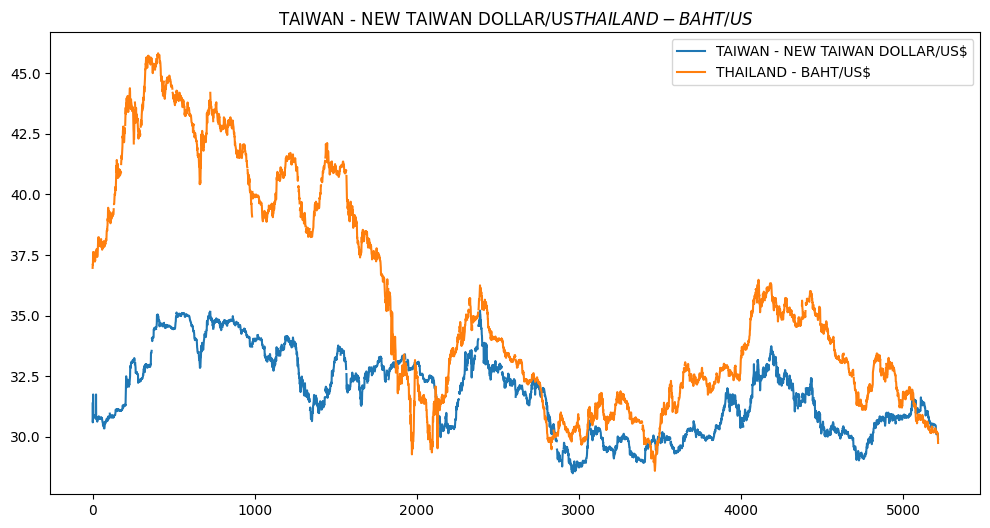

In [21]:
# Plotting Time-series
# Spliting currencies into groups of 4
col_grps = [df.columns[i:i+4] for i in range(1, len(df.columns), 4)]

for grp in col_grps:
  df[grp].plot(figsize=(12,6), title=" ".join(grp))
  plt.show()

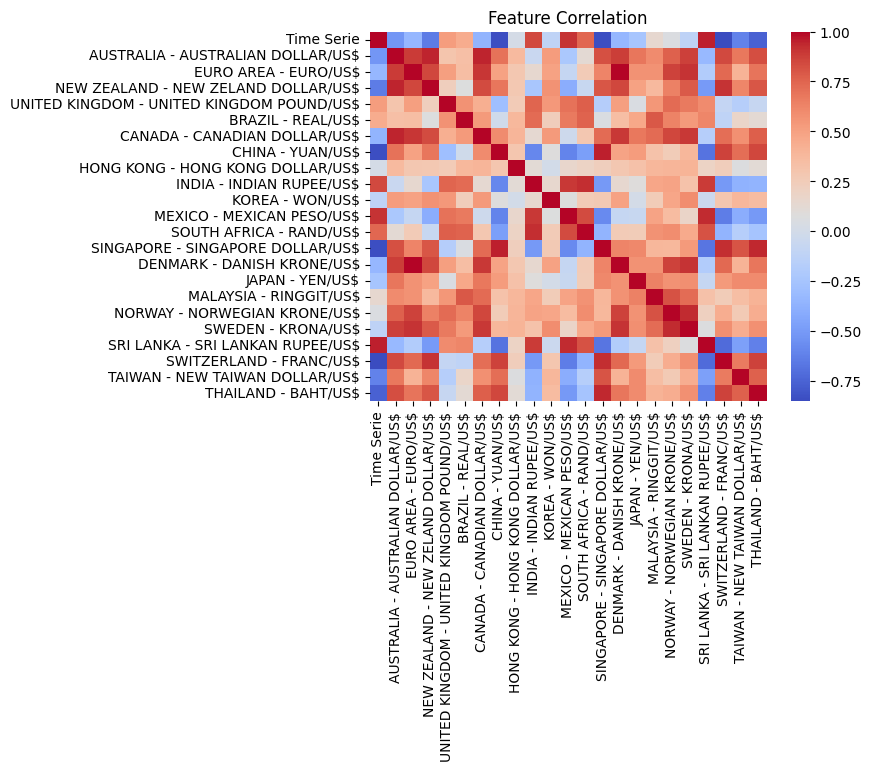

In [22]:
# Plotting the correlation of the variables
# Correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

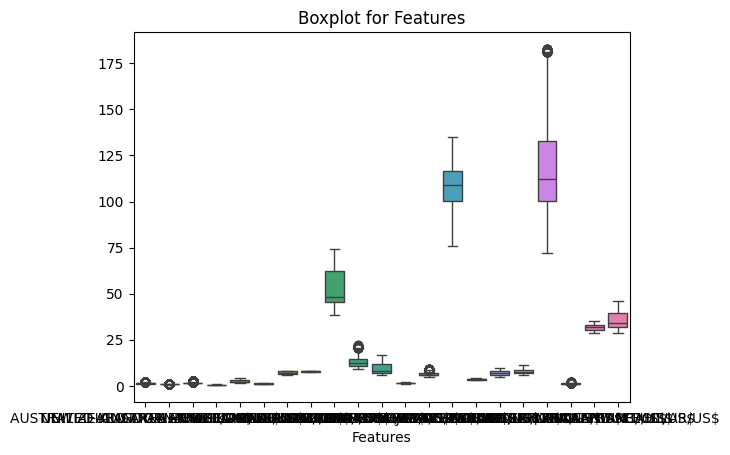

In [23]:
# Boxplot of features
sns.boxplot(data=df.drop('KOREA - WON/US$',axis=1))
plt.title('Boxplot for Features')
plt.xlabel('Features')
plt.show()

In [24]:
#selecting currency

options = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZEALAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

selected_option = 'SRILANKAN RUPEE' #select currency here to train model

In [45]:
df_selected = df[['Time Serie',options.get(selected_option)]]
df_selected.dropna()
df_selected.head()

,Time Serie,SRI LANKA - SRI LANKAN RUPEE/US$
0,2000-01-03,72.30
1,2000-01-04,72.65
2,2000-01-05,72.95
3,2000-01-06,72.95
4,2000-01-07,73.15


In [46]:
# Preparing data for tensorflow
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)

n_input = 7  # Use 7 days to forecast the next day
Currency = df_selected.iloc[:,1]

X, y = Sequential_Input_LSTM(Currency, n_input)
X.shape, y.shape


((5210, 7), (5210,))

In [48]:
X

array([[ 72.3 ,  72.65,  72.95, ...,  73.15,  73.3 ,  73.35],
       [ 72.65,  72.95,  72.95, ...,  73.3 ,  73.35,  73.35],
       [ 72.95,  72.95,  73.15, ...,  73.35,  73.35,  73.35],
       ...,
       [181.1 , 181.4 , 181.  , ..., 181.3 ,    nan, 181.3 ],
       [181.4 , 181.  , 181.25, ...,    nan, 181.3 , 181.35],
       [181.  , 181.25, 181.3 , ..., 181.3 , 181.35, 181.6 ]],
      shape=(5210, 7))

In [49]:
y

array([ 73.35,  73.35,  73.35, ..., 181.35, 181.6 , 181.3 ], shape=(5210,))

In [50]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=22, stratify=y)


ValueError: Input y contains NaN.

In [11]:
# Finding the best model for each currency
from sklearn.metrics import mean_absolute_error, mean_squared_error

metrics = []

def performance(name, y_pred, y_test):
    metrics.append({
        'Model ': name,
        'MAE': mean_absolute_error(y_test, y_pred), # Determine the MAE (Mean absolute error)
        'RMSE': mean_squared_error(y_test, y_pred), # Determine the RMSE (Root mean squared error)
        'MAPE': np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test)) * 100) # Determine the MAPE (Mean Absolute Percentage Error)

    })
    
 


## Models 

In [13]:
# Model 1 : AutoTS

forecast=10 #no of days for forecasting

model = AutoTS(forecast_length=int(forecast), frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(df, date_col = 'Time Serie', value_col=options[selected_option], id_col=None)

Using 2 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 25
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 25
Model Number: 9 with model ETS in generation 0 of 25
Model Number: 10 with model GLM in generation 0 of 25
Model Number: 11 with model GLM in generation 0 of 25
Model Number: 12 with model GLS in generation 0 of 25
Model Number: 13 with model GLS in generation 0 of 25
Model Number: 14 with model LastValueNaive in generation 0 of 25
Model Number: 15 with model LastValueNaive in generation 0 of 25
Model Number: 16 with model LastValueNaive in generation 0 of 25
Model Number: 17 with model LastValueNaive in generation 0 of 25
Model Number: 18 with model SeasonalNaive in generation 0 of 25
Model Number: 19 with model SeasonalNaive in generation 0 of 25
Model Number: 20 with model SeasonalNaive in generation 0 of 25
Model Number

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 24 with model ConstantNaive in generation 0 of 25
Model Number: 25 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 25 in generation 0: FBProphet
Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 o

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1328: RuntimeWarning: invalid valu

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 55 in generation 0: GLM
Model Number: 56 with model UnivariateMotif in generation 0 of 25
Model Number: 57 with model ARDL in generation 0 of 25
Model Number: 58 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model ConstantNaive in generation 0 of 25
Model Number: 60 with model LastValueNaive in generation 0 of 25
Model Number: 61 with model AverageValueNaive in generation 0 of 25
Model Number: 62 with model GLS in generation 0 of 25
Model Number: 63 with model SeasonalNaive in generation 0 of 25
Model Number: 64 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 64 in generation 0: VAR
Model Number: 65 with model WindowRegression in generation 0 of 25
Model Number: 66 with model DatepartRegr

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 70 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('Shape of passed values is (184, 4), indices imply (184, 2)') in model 70 in generation 0: Cassandra
Model Number: 71 with model SeasonalityMotif in generation 0 of 25
Model Number: 72 with model FFT in generation 0 of 25
Model Number: 73 with model BasicLinearModel in generation 0 of 25
Model Number: 74 with model MetricMotif in generation 0 of 25
Model Number: 75 with model GLS in generation 0 of 25
Model Number: 76 with model SeasonalityMotif in generation 0 of 25
Model Number: 77 with model ETS in generation 0 of 25
Model Number: 78 with model ConstantNaive in generation 0 of 25
Model Number: 79 with model SectionalMotif in generation 0 of 25
Model Number: 80 with model SectionalMotif in generation 0 of 25
Model Number: 81 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError('Input X contains NaN.\nElasticNet does not accept missing values encoded as NaN native

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 87 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 87 in generation 0: FBProphet
Model Number: 88 with model ConstantNaive in generation 0 of 25
Model Number: 89 with model WindowRegression in generation 0 of 25
Model Number: 90 with model ETS in generation 0 of 25
Model Number: 91 with model UnivariateMotif in generation 0 of 25
Model Number: 92 with model SeasonalityMotif in generation 0 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 93 with model DatepartRegression in generation 0 of 25
Model Number: 94 with model FFT in generation 0 of 25
Model Number: 95 with model UnivariateMotif in generation 0 of 25
Model Number: 96 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 96 in generation 0: FBProphet
Model Number: 97 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 97 in generation 0: ARCH
Model Number: 98 with model DatepartRegression in generation 0 of 25
Model Number: 99 with model BasicLinearModel in generation 0 of 25
Model Number: 100 with model FFT in generation 0 of 25
Model Number: 101 with model LastValueNaive in generation 0 of 25
Model Number: 102 with model LastValueNaive in generation 0 of 25
Model Number: 103 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('The given frequency argument is incompatible with the gi

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 106 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 106 in generation 0: VAR
Model Number: 107 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model SeasonalityMotif in generation 0 of 25
Model Number: 109 with model ETS in generation 0 of 25
Model Number: 110 with model ConstantNaive in generation 0 of 25
Model Number: 111 with model SeasonalNaive in generation 0 of 25
Model Number: 112 with model SectionalMotif in generation 0 of 25
Model Number: 113 with model LastValueNaive in generation 0 of 25
Model Number: 114 with model GLM in generation 0 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 114 in generation 0: GLM
Model Number: 115 with model MetricMotif in generation 0 of 25
Model Number: 116 with model GLM in generation 0 of 2

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 140 with model ETS in generation 0 of 25
Model Number: 141 with model SeasonalityMotif in generation 0 of 25
Model Number: 142 with model SeasonalNaive in generation 0 of 25
Model Number: 143 with model ARDL in generation 0 of 25
Model Number: 144 with model AverageValueNaive in generation 0 of 25
Model Number: 145 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 145 in generation 0: ARDL
Model Number: 146 with model SeasonalityMotif in generation 0 of 25
Model Number: 147 with model MetricMotif in generation 0 of 25
Model Number: 148 with model SeasonalityMotif in generation 0 of 25
Model Number: 149 with model FBProphet in generation 0 of 25
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 149 in generation 0: FBProphet
Model Number: 150 with model SectionalMotif in generation 0 of 25
Model Number: 151 with model SeasonalNaive in generation 0 of 25
T

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 161 with model UnivariateMotif in generation 1 of 25
Model Number: 162 with model ARDL in generation 1 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 162 in generation 1: ARDL
Model Number: 163 with model LastValueNaive in generation 1 of 25
Model Number: 164 with model ETS in generation 1 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params mean {\'0\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 6, \'eta\': 0.3, \'min_child_weight\': 10, \'subsample\': 1, \'colsample_bylevel\': 0.7, \'reg_alpha\': 0, \'reg_lambda\': 1}, \'datepart_method\': \'recurring\'}, \'fillna\': \'linear\'}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 63}, \'2\': {\'method\': \'remove\', \'std_threshold\': 3.5, \'fillna\': \'mean\'}} with error ModuleNotFoundError("No module named \'xgboost\'")') in

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 170 with model WindowRegression in generation 1 of 25
Model Number: 171 with model SeasonalNaive in generation 1 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 172 with model FFT in generation 1 of 25
Model Number: 173 with model LastValueNaive in generation 1 of 25
Model Number: 174 with model LastValueNaive in generation 1 of 25
Model Number: 175 with model ETS in generation 1 of 25
Model Number: 176 with model LastValueNaive in generation 1 of 25
Model Number: 177 with model BasicLinearModel in generation 1 of 25
Model Number: 178 with model GLS in generation 1 of 25
Model Number: 179 with model SectionalMotif in generation 1 of 25
Model Number: 180 with model WindowRegression in generation 1 of 25
Model Number: 181 with model DatepartRegression in generation 1 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 181 in generation 1: DatepartRegression
Model Number: 182 with model SeasonalityMotif in generation 1 of 25
Model Number: 183 with model SeasonalNaive in generation 1 of 25
Model Number: 184 with model DatepartRegression in generation 1 of 25
Model Number: 185 with model AverageValueNaive in generation 1 of 25
Model Number: 186 with model SectionalMotif in generation 1 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 186 in generation 1: SectionalMotif
Model Number: 187 with model LastValueNaive in generation 1 of 25
Model Number: 188 with model WindowRegression in generation 1 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 189 with model SeasonalityMotif in generation 1 of 25
Model Number: 190 with model LastValueNaive in generation 1 of 25
Model Number: 191 with model DatepartRegression in generation 1 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 191 in generation 1: DatepartRegression
Model Number: 192 with model LastValueNaive in generation 1 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params zero {\'0\': {\'model_name\': \'dynamic linear\', \'state_transition\': [[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1.4, 1], [0, 0, 0.9, 0]], \'process_noise\': [[0.0, 0, 0, 0], [0, 1.4, 0, 0], [0, 0, 0.2, 0], [0, 0, 0, 0]], \'observation_model\': [[1, 0, 1, 0]], \'observation_noise\': 0.25, \'em_iter\': 10, \'on_transform\': True, \'on_inverse\': False}, \'1\': {\'model\': \'Linear\', \'phi\': 1, \'window\': 365, \'transform_dict\': None}, \'2\': {\'whiten\': False, \'n_components\': 10}, \'3\': {\'rows\': 1, \'lag\': 1

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 204 with model SectionalMotif in generation 1 of 25
Model Number: 205 with model ARDL in generation 1 of 25
Model Number: 206 with model SectionalMotif in generation 1 of 25
Model Number: 207 with model FFT in generation 1 of 25
Model Number: 208 with model ConstantNaive in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'lag_1': 12, 'method': 5}} with error ValueError('BTCD only works on multivarate series')") in model 208 in generation 1: ConstantNaive
Model Number: 209 with model LastValueNaive in generation 1 of 25
Model Number: 210 with model AverageValueNaive in generation 1 of 25
Model Number: 211 with model Cassandra in generation 1 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': Tru

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 226 with model AverageValueNaive in generation 1 of 25
Model Number: 227 with model BasicLinearModel in generation 1 of 25
Model Number: 228 with model SectionalMotif in generation 1 of 25
Model Number: 229 with model ConstantNaive in generation 1 of 25
Model Number: 230 with model LastValueNaive in generation 1 of 25
Model Number: 231 with model UnivariateMotif in generation 1 of 25
Model Number: 232 with model LastValueNaive in generation 1 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Model Number: 233 with model ConstantNaive in generation 1 of 25
Model Number: 234 with model ETS in generation 1 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 235 with model SeasonalNaive in generation 1 of 25
Model Number: 236 with model ARDL in generation 1 of 25
Model Number: 237 with model LastValueNaive in generation 1 of 25
Model Number: 238 with model RRVAR in generation 1 of 25
Model Number: 239 with model SeasonalityMotif in generation 1 of 25
Model Number: 240 with model AverageValueNaive in generation 1 of 25
Model Number: 241 with model GLM in generation 1 of 25
Model Number: 242 with model SeasonalityMotif in generation 1 of 25
Model Number: 243 with model SectionalMotif in generation 1 of 25
Model Number: 244 with model SeasonalNaive in generation 1 of 25
Model Number: 245 with model ConstantNaive in generation 1 of 25
Model Number: 246 with model SeasonalNaive in generation 1 of 25
Model Number: 247 with model UnivariateMotif in generation 1 of 25
Model Number: 248 with model SeasonalityMotif in generation 1 of 25
Model Number: 249 with model FFT in generation 1 of 25
Model Number: 250 with model GLS in generatio

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError('operands could not be broadcast together with shapes (28,1) (10,1) ') in model 250 in generation 1: GLS
Model Number: 251 with model SectionalMotif in generation 1 of 25
Model Number: 252 with model AverageValueNaive in generation 1 of 25
Model Number: 253 with model AverageValueNaive in generation 1 of 25
Model Number: 254 with model GLM in generation 1 of 25
Model Number: 255 with model ETS in generation 1 of 25

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)



Model Number: 256 with model SeasonalityMotif in generation 1 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {}, '2': {'theta_values': [0.2, 1.8]}, '3': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}} with error ValueError('Coint only works on multivarate series')") in model 256 in generation 1: SeasonalityMotif
Model Number: 257 with model RRVAR in generation 1 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'Poisson', 'phi': 1, 'window': 90, 'transform_dict': None}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}} with error ValueError('Found input variables with inconsistent numbers of samples: [90, 190]')") in model 257 in generation 1: RRVAR
Model Number:

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 259 with model GLM in generation 1 of 25
Model Number: 260 with model MetricMotif in generation 1 of 25
Model Number: 261 with model ARDL in generation 1 of 25
Model Number: 262 with model ConstantNaive in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'output_distribution': 'uniform', 'n_quantiles': 63}, '2': {'lag_1': 7, 'method': 'LastValue'}} with error ValueError('BTCD only works on multivarate series')") in model 262 in generation 1: ConstantNaive
New Generation: 2 of 25
Model Number: 263 with model DatepartRegression in generation 2 of 25
Model Number: 264 with model FFT in generation 2 of 25
Model Number: 265 with model AverageValueNaive in generation 2 of 25
Model Number: 266 with model ConstantNaive in generation 2 of 25
Model Number: 267 with model ARDL in generation 2 of 25
Model Number: 268 with model LastValueNaive

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 290 with model MetricMotif in generation 2 of 25
Model Number: 291 with model GLS in generation 2 of 25
Model Number: 292 with model AverageValueNaive in generation 2 of 25
Model Number: 293 with model ConstantNaive in generation 2 of 25
Model Number: 294 with model RRVAR in generation 2 of 25
Model Number: 295 with model ETS in generation 2 of 25
Model Number: 296 with model ETS in generation 2 of 25
Model Number: 297 with model AverageValueNaive in generation 2 of 25
Model Number: 298 with model Cassandra in generation 2 of 25
Template Eval Error: LinAlgError('Singular matrix') in model 298 in generation 2: Cassandra
Model Number: 299 with model SeasonalityMotif in generation 2 of 25
Template Eval Error: Exception("Transformer UpscaleDownscaleTransformer failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'mode': 'upscale', 'factor': 6, 'down_method': 'decimate', 'fill_method': 'cubic'

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 301 with model LastValueNaive in generation 2 of 25
Model Number: 302 with model AverageValueNaive in generation 2 of 25
Model Number: 303 with model LastValueNaive in generation 2 of 25
Model Number: 304 with model AverageValueNaive in generation 2 of 25
Model Number: 305 with model LastValueNaive in generation 2 of 25
Model Number: 306 with model SeasonalityMotif in generation 2 of 25
Model Number: 307 with model MetricMotif in generation 2 of 25
Model Number: 308 with model ARDL in generation 2 of 25
Model Number: 309 with model SeasonalityMotif in generation 2 of 25
Model Number: 310 with model LastValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params median {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'window': None}, '3': {'lag': 1, 'fill': 'zero'}, '4': {'lag_1': 7, 'method': 'Mean'}} with error 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Template Eval Error: ValueError('operands could not be broadcast together with shapes (42,1) (10,1) ') in model 320 in generation 2: WindowRegression
Model Number: 321 with model MetricMotif in generation 2 of 25
Model Number: 322 with model AverageValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'center': 'median'}, '1': {'low': 6, 'high': 28, 'K': 6, 'lanczos_factor': False, 'return_diff': True, 'on_transform': False, 'on_inverse': True}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 322 in generation 2: AverageValueNaive
Model Number: 323 with model SectionalMotif in generation 2 of 25
Model Number: 324 with model SectionalMotif in generation 2 of 25
Model Number: 325 with model WindowRegression in generation 2 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Template Eval Error: ValueError('operands could not be broadcast together with shapes (42,1) (10,1) ') in model 325 in generation 2: WindowRegression
Model Number: 326 with model BasicLinearModel in generation 2 of 25
Model Number: 327 with model SeasonalNaive in generation 2 of 25
Model Number: 328 with model ETS in generation 2 of 25
Model Number: 329 with model FFT in generation 2 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 330 with model ETS in generation 2 of 25
Model Number: 331 with model ARDL in generation 2 of 25
Model Number: 332 with model ARDL in generation 2 of 25
Model Number: 333 with model WindowRegression in generation 2 of 25
Model Number: 334 with model BasicLinearModel in generation 2 of 25
Model Number: 335 with model SectionalMotif in generation 2 of 25
Model Number: 336 with model SectionalMotif in generation 2 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 337 with model LastValueNaive in generation 2 of 25
Model Number: 338 with model BasicLinearModel in generation 2 of 25
Model Number: 339 with model LastValueNaive in generation 2 of 25
Model Number: 340 with model DatepartRegression in generation 2 of 25
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 340 in generation 2: DatepartRegression
Model Number: 341 with model ETS in generation 2 of 25
Model Number: 342 with model MetricMotif in generation 2 of 25
Model Number: 343 with model UnivariateMotif in generation 2 of 25
Model Number: 344 with model AverageValueNaive in generation 2 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'output_distribution': 'uniform', 'n_quantiles': 63}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 351 with model DatepartRegression in generation 2 of 25
Model Number: 352 with model LastValueNaive in generation 2 of 25
Model Number: 353 with model ARDL in generation 2 of 25
Model Number: 354 with model SeasonalityMotif in generation 2 of 25
Model Number: 355 with model LastValueNaive in generation 2 of 25
Model Number: 356 with model SectionalMotif in generation 2 of 25
Model Number: 357 with model SeasonalityMotif in generation 2 of 25
Model Number: 358 with model ARDL in generation 2 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 359 with model ARDL in generation 2 of 25
Model Number: 360 with model DatepartRegression in generation 2 of 25
Model Number: 361 with model ARDL in generation 2 of 25
Model Number: 362 with model FFT in generation 2 of 25
Model Number: 363 with model SectionalMotif in generation 2 of 25
Model Number: 364 with model ARDL in generation 2 of 25
Model Number: 365 with model AverageValueNaive in generation 2 of 25
Model Number: 366 with model FFT in generation 2 of 25
Model Number: 367 with model SeasonalNaive in generation 2 of 25
New Generation: 3 of 25
Model Number: 368 with model WindowRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 368 in generation 3: WindowRegression
Model Number: 369 with model AverageValueNaive in generation 3 of 25
Model Number: 370 with model ConstantNaive in generation 3 of 25
Model Number: 371 with model MetricMotif in generation 3 of 25
Model Number: 372 with mode

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 377 with model GLS in generation 3 of 25
Model Number: 378 with model SectionalMotif in generation 3 of 25
Model Number: 379 with model LastValueNaive in generation 3 of 25
Model Number: 380 with model LastValueNaive in generation 3 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 3, \'fillna\': None}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 2, \'eta\': 0.03, \'min_child_weight\': 5, \'subsample\': 1, \'colsample_bylevel\': 0.5, \'reg_alpha\': 0, \'reg_lambda\': 1, \'n_estimators\': 100}, \'datepart_method\': \'recurring\'}, \'fillna\': \'linear\'}, \'2\': {}} with error ModuleNotFoundError("No module named \'xgboost\'")') in model 380 in generation 3: LastValueNaive
Model Number: 381 with model ARDL in generation 3 of 25
Model Number: 382 with model AverageValueNaive in generation

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.18827e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 396 with model ETS in generation 3 of 25
Model Number: 397 with model RRVAR in generation 3 of 25
Model Number: 398 with model RRVAR in generation 3 of 25
Model Number: 399 with model ARDL in generation 3 of 25
Model Number: 400 with model SectionalMotif in generation 3 of 25
Model Number: 401 with model FFT in generation 3 of 25
Model Number: 402 with model SectionalMotif in generation 3 of 25
Model Number: 403 with model BasicLinearModel in generation 3 of 25
Model Number: 404 with model AverageValueNaive in generation 3 of 25
Model Number: 405 with model LastValueNaive in generation 3 of 25
Model Number: 406 with model SeasonalNaive in generation 3 of 25
Model Number: 407 with model GLS in generation 3 of 25
Model Number: 408 with model SectionalMotif in generation 3 of 25
Model Number: 409 with model MetricMotif in generation 3 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 410 with model WindowRegression in generation 3 of 25
Model Number: 411 with model LastValueNaive in generation 3 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params zero {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gbtree\', \'max_depth\': 2, \'eta\': 0.03, \'min_child_weight\': 5, \'subsample\': 1, \'colsample_bylevel\': 0.5, \'reg_alpha\': 0, \'reg_lambda\': 1, \'n_estimators\': 100}, \'datepart_method\': \'recurring\'}, \'fillna\': \'linear\'}, \'2\': {}, \'3\': {\'span\': 364}} with error ModuleNotFoundError("No module named \'xgboost\'")') in model 411 in generation 3: LastValueNaive
Model Number: 412 with model SeasonalNaive in generation 3 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 413 with model SeasonalityMotif in generation 3 of 25
Model Number: 414 with model ARDL in generation 3 of 25
Model Number: 415 with model GLS in generation 3 of 25
Model Number: 416 with model MetricMotif in generation 3 of 25
Model Number: 417 with model ARDL in generation 3 of 25
Model Number: 418 with model ETS in generation 3 of 25
Model Number: 419 with model ConstantNaive in generation 3 of 25
Model Number: 420 with model MetricMotif in generation 3 of 25
Model Number: 421 with model MetricMotif in generation 3 of 25
Model Number: 422 with model UnivariateMotif in generation 3 of 25
Model Number: 423 with model LastValueNaive in generation 3 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params akima {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {'span': 28}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.2, 'first_value_only': False, 'threshold': 3, 'threshold_method': 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 456 with model MetricMotif in generation 3 of 25
Model Number: 457 with model MetricMotif in generation 3 of 25
Model Number: 458 with model SeasonalityMotif in generation 3 of 25
Model Number: 459 with model LastValueNaive in generation 3 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'det_order': -1, 'k_ar_diff': 0}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}} with error ValueError('Coint only works on multivarate series')") in model 459 in generation 3: LastValueNaive
Model Number: 460 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError('Model DatepartRegression returned improper forecast

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 492 with model BasicLinearModel in generation 4 of 25
Model Number: 493 with model ARDL in generation 4 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 494 with model GLS in generation 4 of 25
Model Number: 495 with model ETS in generation 4 of 25
Model Number: 496 with model SeasonalNaive in generation 4 of 25
Model Number: 497 with model AverageValueNaive in generation 4 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params cubic {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {}, '2': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'rolling_zscore', 'method_params': {'distribution': 'uniform', 'alpha': 0.05, 'rolling_periods': 28, 'center': True}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'ffill', 'transforma

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params akima {'0': {}, '1': {'span': 28}, '2': {}, '3': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}} with error BracketError('The algorithm terminated without finding a valid bracket. Consider trying different initial points.')") in model 498 in generation 4: SeasonalNaive
Model Number: 499 with model LastValueNaive in generation 4 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:3475: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 500 with model MetricMotif in generation 4 of 25
Model Number: 501 with model SeasonalityMotif in generation 4 of 25
Template Eval Error: Exception("Transformer AnomalyRemoval failed on fit from params linear {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'ffill', 'transformations': {'0': 'PCA'}, 'transformation_params': {'0': {'whiten': False, 'n_components': 24}}}, 'isolated_only': True, 'on_inverse': False}, '2': {}, '3': {'output_distribution': 'uniform', 'n_quantiles': 1000}} with error Exception('Transformer PCA failed on fit')") in model 501 in generation 4: SeasonalityMotif
Model Number: 502 with model ETS in generation 4 of 25
Model Number: 503 with model RRVAR in generation 4 of 25
Model Number: 504 with model WindowRegression in generation 4 of 25
Model Number: 505 with model MetricMotif in generation 4 of

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.18827e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 515 with model LastValueNaive in generation 4 of 25
Model Number: 516 with model FFT in generation 4 of 25
Model Number: 517 with model ARDL in generation 4 of 25
Model Number: 518 with model MetricMotif in generation 4 of 25
Model Number: 519 with model MetricMotif in generation 4 of 25
Model Number: 520 with model LastValueNaive in generation 4 of 25
Model Number: 521 with model LastValueNaive in generation 4 of 25
Model Number: 522 with model SectionalMotif in generation 4 of 25
Model Number: 523 with model LastValueNaive in generation 4 of 25
Model Number: 524 with model LastValueNaive in generation 4 of 25
Model Number: 525 with model SectionalMotif in generation 4 of 25
Model Number: 526 with model ConstantNaive in generation 4 of 25
Model Number: 527 with model AverageValueNaive in generation 4 of 25
Model Number: 528 with model SeasonalityMotif in generation 4 of 25
Model Number: 529 with model SeasonalityMotif in generation 4 of 25
Model Number: 530 with model Co

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 533 with model MetricMotif in generation 4 of 25
Model Number: 534 with model SeasonalityMotif in generation 4 of 25
Model Number: 535 with model WindowRegression in generation 4 of 25
Model Number: 536 with model FFT in generation 4 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params akima {'0': {'window': 24}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_param

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 538 with model AverageValueNaive in generation 4 of 25
Model Number: 539 with model BasicLinearModel in generation 4 of 25
Model Number: 540 with model ARDL in generation 4 of 25
Model Number: 541 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 541 in generation 4: ARDL
Model Number: 542 with model RRVAR in generation 4 of 25
Model Number: 543 with model Cassandra in generation 4 of 25
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 543 in generation 4: Cassandra
Model Number: 544 with model ETS in generation 4 of 25
Model Number: 545 with model LastValueNaive in generation 4 of 25
Model Number: 546 with model FFT in generation 4 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill_mean_biased {\'0\': {\'numtaps\': 64, \'cutoff_hz\': 0.01, \'window\': [\'kaiser\', 4.0], \'sampling_frequenc

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 549 with model DatepartRegression in generation 4 of 25
Model Number: 550 with model MetricMotif in generation 4 of 25
Model Number: 551 with model MetricMotif in generation 4 of 25
Model Number: 552 with model ETS in generation 4 of 25
Model Number: 553 with model ARDL in generation 4 of 25
Model Number: 554 with model FFT in generation 4 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params akima {'0': {'rows': 1, 'displacement_rows': 1, 'quantile': 0.5, 'decay_span': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': False, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_we

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 580 with model DatepartRegression in generation 5 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 581 with model MetricMotif in generation 5 of 25
Model Number: 582 with model ARDL in generation 5 of 25
Model Number: 583 with model FFT in generation 5 of 25
Model Number: 584 with model UnivariateMotif in generation 5 of 25
Model Number: 585 with model ETS in generation 5 of 25
Model Number: 586 with model LastValueNaive in generation 5 of 25
Model Number: 587 with model GLS in generation 5 of 25
Model Number: 588 with model ConstantNaive in generation 5 of 25
Model Number: 589 with model SectionalMotif in generation 5 of 25
Model Number: 590 with model LastValueNaive in generation 5 of 25
Model Number: 591 with model FFT in generation 5 of 25
Model Number: 592 with model ConstantNaive in generation 5 of 25
Model Number: 593 with model ARDL in generation 5 of 25
Model Number: 594 with model BasicLinearModel in generation 5 of 25
Model Number: 595 with model AverageValueNaive in generation 5 of 25
Model Number: 596 with model GLS in generation 5 of 25
Model Number: 597 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packag

Template Eval Error: ValueError('operands could not be broadcast together with shapes (42,1) (10,1) ') in model 614 in generation 5: WindowRegression
Model Number: 615 with model FFT in generation 5 of 25
Model Number: 616 with model ConstantNaive in generation 5 of 25
Model Number: 617 with model SeasonalNaive in generation 5 of 25
Model Number: 618 with model GLM in generation 5 of 25
Model Number: 619 with model RRVAR in generation 5 of 25
Model Number: 620 with model SectionalMotif in generation 5 of 25
Model Number: 621 with model ARDL in generation 5 of 25
Model Number: 622 with model FFT in generation 5 of 25
Model Number: 623 with model GLS in generation 5 of 25
Model Number: 624 with model SectionalMotif in generation 5 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'det_order': -1, 'k_

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.18827e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 651 with model MetricMotif in generation 5 of 25
Model Number: 652 with model ARDL in generation 5 of 25
Model Number: 653 with model ARDL in generation 5 of 25
Model Number: 654 with model SeasonalityMotif in generation 5 of 25
Model Number: 655 with model AverageValueNaive in generation 5 of 25
Model Number: 656 with model LastValueNaive in generation 5 of 25
Model Number: 657 with model FFT in generation 5 of 25
Model Number: 658 with model GLS in generation 5 of 25
Model Number: 659 with model SeasonalityMotif in generation 5 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params linear {\'0\': {\'method\': \'remove\', \'std_threshold\': 4, \'fillna\': \'rolling_mean_24\'}, \'1\': {\'numtaps\': 64, \'cutoff_hz\': 0.1, \'window\': [\'chebwin\', 100], \'sampling_frequency\': 4, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.7, \'first_value_

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


New Generation: 6 of 25
Model Number: 662 with model FFT in generation 6 of 25
Model Number: 663 with model GLS in generation 6 of 25
Model Number: 664 with model ConstantNaive in generation 6 of 25
Model Number: 665 with model ConstantNaive in generation 6 of 25
Model Number: 666 with model LastValueNaive in generation 6 of 25
Model Number: 667 with model SeasonalityMotif in generation 6 of 25
Model Number: 668 with model GLS in generation 6 of 25
Model Number: 669 with model GLS in generation 6 of 25
Model Number: 670 with model ARDL in generation 6 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'lag_1': 364, 'method': 20}, '1': {'span': 28}, '2': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}} with error ValueError('cannot reshape array of size 190 into shape (0,364,newaxis)')") in model 670 in generation 6: ARDL
Model Number: 671 with model ARDL in generation 6 of 25
Template Eval Error: ValueError("regression_t

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 673 with model ARDL in generation 6 of 25
Model Number: 674 with model FFT in generation 6 of 25
Model Number: 675 with model ARDL in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 675 in generation 6: ARDL
Model Number: 676 with model GLS in generation 6 of 25
Model Number: 677 with model LastValueNaive in generation 6 of 25
Model Number: 678 with model ARDL in generation 6 of 25
Model Number: 679 with model BasicLinearModel in generation 6 of 25
Model Number: 680 with model LastValueNaive in generation 6 of 25
Model Number: 681 with model SectionalMotif in generation 6 of 25
Model Number: 682 with model FFT in generation 6 of 25
Model Number: 683 with model ETS in generation 6 of 25
Model Number: 684 with model MetricMotif in generation 6 of 25
Model Number: 685 with model WindowRegression in generation 6 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 686 with model FFT in generation 6 of 25
Model Number: 687 with model LastValueNaive in generation 6 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {}} with error ValueError('BTCD only works on multivarate series')") in model 687 in generation 6: LastValueNaive
Model Number: 688 with model SeasonalityMotif in generation 6 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {}, '2': {}, '3': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '4': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 693 with model SectionalMotif in generation 6 of 25
Model Number: 694 with model LastValueNaive in generation 6 of 25
Model Number: 695 with model AverageValueNaive in generation 6 of 25
Model Number: 696 with model DatepartRegression in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 696 in generation 6: DatepartRegression
Model Number: 697 with model FFT in generation 6 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params akima {\'0\': {\'span\': 364}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'base_score\': 0.5, \'booster\': \'gbtree\', \'colsample_bylevel\': 0.692, \'learning_rate\': 0.022, \'max_bin\': 256, \'max_depth\': 14, \'max_leaves\': 0, \'min_child_weight\': 0.024, \'n_estimators\': 162}, \'datepart_method\': \'common_fourier\'}, \'fillna\': \'pchip\'}, \'2\': {\'method\': \'med_diff\', \'method_para

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.18827e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 750 with model ARDL in generation 7 of 25
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'polyorder': 2, 'deriv': 0, 'mode': 'interp'}}, '1': {'output_distribution': 'uniform', 'n_quantiles': 61}, '2': {'window_size': 4, 'alpha': 3.5, 'grouping_forward_limit': 6, 'max_level_shifts': 5, 'alignment': 'average'}, '3': {'decimals': 2, 'on_transform': False, 'on_inverse': True}, '4': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 784 with model BasicLinearModel in generation 7 of 25
Model Number: 785 with model GLS in generation 7 of 25
Model Number: 786 with model RRVAR in generation 7 of 25
Model Number: 787 with model GLS in generation 7 of 25
Model Number: 788 with model ETS in generation 7 of 25
Model Number: 789 with model MetricMotif in generation 7 of 25
Model Number: 790 with model LastValueNaive in generation 7 of 25
Model Number: 791 with model BasicLinearModel in generation 7 of 25
Model Number: 792 with model FFT in generation 7 of 25
Model Number: 793 with model ConstantNaive in generation 7 of 25
Model Number: 794 with model AverageValueNaive in generation 7 of 25
Model Number: 795 with model SectionalMotif in generation 7 of 25
Model Number: 796 with model AverageValueNaive in generation 7 of 25
Model Number: 797 with model SeasonalityMotif in generation 7 of 25
Model Number: 798 with model MetricMotif in generation 7 of 25
Template Eval Error: Exception('Transformer ReplaceConstan

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 800 with model SeasonalityMotif in generation 7 of 25
Model Number: 801 with model ARDL in generation 7 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 802 with model AverageValueNaive in generation 7 of 25
Model Number: 803 with model SeasonalityMotif in generation 7 of 25
Model Number: 804 with model WindowRegression in generation 7 of 25
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 804 in generation 7: WindowRegression
Model Number: 805 with model MetricMotif in generation 7 of 25
Model Number: 806 with model SeasonalityMotif in generation 7 of 25
Model Number: 807 with model SeasonalityMotif in generation 7 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (98,1) (10,1) ') in model 807 in generation 7: SeasonalityMotif
Model Number: 808 with model SectionalMotif in generation 7 of 25
Model Number: 809 with model SectionalMotif in generation 7 of 25
Model Number: 810 with model GLS in generation 7 of 25
Model Number: 811 with model GLS in generation 7 of 25
Model Number: 812 with model SeasonalityMotif in generation 7 of 25
Model Number: 813 w

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 841 with model SectionalMotif in generation 8 of 25
Model Number: 842 with model SeasonalityMotif in generation 8 of 25
Model Number: 843 with model BasicLinearModel in generation 8 of 25
Model Number: 844 with model WindowRegression in generation 8 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 845 with model GLM in generation 8 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 846 with model RRVAR in generation 8 of 25
Model Number: 847 with model LastValueNaive in generation 8 of 25
Model Number: 848 with model ARDL in generation 8 of 25
Model Number: 849 with model BasicLinearModel in generation 8 of 25
Model Number: 850 with model SectionalMotif in generation 8 of 25
Model Number: 851 with model SeasonalNaive in generation 8 of 25
Model Number: 852 with model AverageValueNaive in generation 8 of 25
Model Number: 853 with model GLS in generation 8 of 25
Model Number: 854 with model MetricMotif in generation 8 of 25
Model Number: 855 with model RRVAR in generation 8 of 25
Model Number: 856 with model FFT in generation 8 of 25
Model Number: 857 with model DatepartRegression in generation 8 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 857 in generation 8: DatepartRegression
Model Number: 858 with model BasicLinearModel in generation 8 of 25
Model Number: 859 with model UnivariateMotif in

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 883 with model SectionalMotif in generation 8 of 25
Model Number: 884 with model SectionalMotif in generation 8 of 25
Model Number: 885 with model ETS in generation 8 of 25
Model Number: 886 with model ETS in generation 8 of 25
Model Number: 887 with model AverageValueNaive in generation 8 of 25
Model Number: 888 with model SeasonalityMotif in generation 8 of 25
Model Number: 889 with model MetricMotif in generation 8 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params rolling_mean {\'0\': {\'window\': 24}, \'1\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'booster\': \'gblinear\', \'max_depth\': 6, \'eta\': 0.05, \'min_child_weight\': 0.05, \'subsample\': 1, \'colsample_bylevel\': 1, \'reg_alpha\': 0, \'reg_lambda\': 1, \'n_estimators\': 10}, \'datepart_method\': [\'morlet_365.25_12_12\', \'ricker_7_7_1\']}, \'fillna\': \'pchip\'}, \'2\': {}} with error ModuleNotFoundError("No module na

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 926 with model BasicLinearModel in generation 9 of 25
Model Number: 927 with model BasicLinearModel in generation 9 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'output_distribution': 'uniform', 'n_quantiles': 63}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {'lag': 1, 'fill': 'zero'}, '3': {}} with error ValueError('BTCD only works on multivarate series')") in model 927 in generation 9: BasicLinearModel
Model Number: 928 with model SectionalMotif in generation 9 of 25
Model Number: 929 with model RRVAR in generation 9 of 25
Model Number: 930 with model FFT in generation 9 of 25
Model Number: 931 with model LastValueNaive in generation 9 of 25
2019-12-18 00:00:00
2019-12-18 00:00:00
2019-12-18 00:00:00
Model Number: 932 with model AverageValueNaive in generation 9 of 25
Model Number: 933 with model ARDL in generation 9 of 25
Model Number: 934 with model BasicLinearModel in gener

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 967 with model ConstantNaive in generation 9 of 25
Model Number: 968 with model FFT in generation 9 of 25
Model Number: 969 with model LastValueNaive in generation 9 of 25
Model Number: 970 with model LastValueNaive in generation 9 of 25
Model Number: 971 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("ARDL series SRI LANKA - SRI LANKAN RUPEE/US$ failed with error ValueError('The number of regressors (552) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (189).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nTime Serie                                                           ...   \n2019-03-27  27.0  0.0  2458569.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2019-03-28  28.0  0.0  2458570.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2019-03-29  29.0  0.0  2458571.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2019-04

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1017 with model WindowRegression in generation 10 of 25
Model Number: 1018 with model AverageValueNaive in generation 10 of 25
Model Number: 1019 with model AverageValueNaive in generation 10 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1020 with model WindowRegression in generation 10 of 25
Model Number: 1021 with model MetricMotif in generation 10 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

Model Number: 1022 with model AverageValueNaive in generation 10 of 25
Model Number: 1023 with model FFT in generation 10 of 25
Model Number: 1024 with model MetricMotif in generation 10 of 25
Model Number: 1025 with model BasicLinearModel in generation 10 of 25
Model Number: 1026 with model LastValueNaive in generation 10 of 25
Model Number: 1027 with model GLS in generation 10 of 25
Model Number: 1028 with model DatepartRegression in generation 10 of 25
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 1028 in generation 10: DatepartRegression
Model Number: 1029 with model ConstantNaive in generation 10 of 25
Model Number: 1030 with model ARDL in generation 10 of 25
Model Number: 1031 with model SeasonalityMotif in generation 10 of 25
Model Number: 1032 with model ARDL in generation 10 of 25
Model Number: 1033 with model SectionalMotif in generation 10 of 25
Model Number: 1034 with model ConstantNaive in generation 10 of 25
Model Number: 1035 with mode

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.575e+01, tolerance: 1.160e-01
  model = cd_fast.enet_coordinate_descent(


Template Eval Error: ValueError("ARDL series SRI LANKA - SRI LANKAN RUPEE/US$ failed with error ValueError('The number of regressors (552) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (189).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nTime Serie                                                           ...   \n2019-03-27  27.0  0.0  2458569.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2019-03-28  28.0  0.0  2458570.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2019-03-29  29.0  0.0  2458571.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2019-04-01   1.0  0.0  2458574.5  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   \n2019-04-02   2.0  0.0  2458575.5  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   \n...          ...  ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   \n2019-12-11  11.0  0.0  2458828.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2019-12

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1115 with model ConstantNaive in generation 11 of 25
Model Number: 1116 with model ARDL in generation 11 of 25
Model Number: 1117 with model ConstantNaive in generation 11 of 25
Model Number: 1118 with model LastValueNaive in generation 11 of 25
Model Number: 1119 with model LastValueNaive in generation 11 of 25
Model Number: 1120 with model MetricMotif in generation 11 of 25
Model Number: 1121 with model MetricMotif in generation 11 of 25
Template Eval Error: ValueError('Shape of passed values is (10, 2), indices imply (10, 1)') in model 1121 in generation 11: MetricMotif
Model Number: 1122 with model LastValueNaive in generation 11 of 25
Model Number: 1123 with model ARDL in generation 11 of 25
New Generation: 12 of 25
Model Number: 1124 with model MetricMotif in generation 12 of 25
Model Number: 1125 with model LastValueNaive in generation 12 of 25
Model Number: 1126 with model ConstantNaive in generation 12 of 25
Model Number: 1127 with model LastValueNaive in generat

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1139 with model BasicLinearModel in generation 12 of 25
Model Number: 1140 with model ARDL in generation 12 of 25
Model Number: 1141 with model SeasonalityMotif in generation 12 of 25
Model Number: 1142 with model SeasonalityMotif in generation 12 of 25
Model Number: 1143 with model BasicLinearModel in generation 12 of 25
Model Number: 1144 with model FFT in generation 12 of 25
Model Number: 1145 with model BasicLinearModel in generation 12 of 25
Model Number: 1146 with model SectionalMotif in generation 12 of 25
Model Number: 1147 with model SectionalMotif in generation 12 of 25
Model Number: 1148 with model ARDL in generation 12 of 25
Model Number: 1149 with model MetricMotif in generation 12 of 25
Model Number: 1150 with model AverageValueNaive in generation 12 of 25
Model Number: 1151 with model AverageValueNaive in generation 12 of 25
Model Number: 1152 with model ConstantNaive in generation 12 of 25
Model Number: 1153 with model ARDL in generation 12 of 25
Model Num

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1168 with model AverageValueNaive in generation 12 of 25
Model Number: 1169 with model AverageValueNaive in generation 12 of 25
Model Number: 1170 with model SeasonalityMotif in generation 12 of 25
Model Number: 1171 with model LastValueNaive in generation 12 of 25
Model Number: 1172 with model FFT in generation 12 of 25
Model Number: 1173 with model RRVAR in generation 12 of 25
Model Number: 1174 with model SeasonalityMotif in generation 12 of 25
Model Number: 1175 with model AverageValueNaive in generation 12 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1176 with model ARDL in generation 12 of 25
Model Number: 1177 with model ARDL in generation 12 of 25
Model Number: 1178 with model LastValueNaive in generation 12 of 25
Model Number: 1179 with model LastValueNaive in generation 12 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {}, '2': {'part': 'trend', 'lamb': 1600}, '3': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0':

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1217 in generation 13: SeasonalityMotif
Model Number: 1218 with model ARDL in generation 13 of 25
Model Number: 1219 with model BasicLinearModel in generation 13 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1219 in generation 13: BasicLinearModel
Model Number: 1220 with model FFT in generation 13 of 25
Model Number: 1221 with model ConstantNaive in generation 13 of 25
Model Number: 1222 with model MetricMotif in generation 13 of 25
Model Number: 1223 with model LastValueNaive in generation 13 of 25
Model Number: 1224 with model MetricMotif in generation 13 of 25
Model Number: 1225 with model LastValueNaive in generation 13 of 25
Model Number: 1226 with model BasicLinearModel in generation 13 of 25
Model Number: 1227 with model BasicLinearModel in generation 13 of 25
Model Number: 1228 with model A

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 1242 with model AverageValueNaive in generation 13 of 25
Model Number: 1243 with model WindowRegression in generation 13 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1244 with model MetricMotif in generation 13 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1245 with model SeasonalityMotif in generation 13 of 25
Model Number: 1246 with model AverageValueNaive in generation 13 of 25
Model Number: 1247 with model GLS in generation 13 of 25
Model Number: 1248 with model ConstantNaive in generation 13 of 25
Model Number: 1249 with model ARDL in generation 13 of 25
New Generation: 14 of 25
Model Number: 1250 with model ARDL in generation 14 of 25
Model Number: 1251 with model AverageValueNaive in generation 14 of 25
Model Number: 1252 with model ConstantNaive in generation 14 of 25
Model Number: 1253 with model BasicLinearModel in generation 14 of 25
Model Number: 1254 with model AverageValueNaive in generation 14 of 25
Model Number: 1255 with model RRVAR in generation 14 of 25
Model Number: 1256 with model ARDL in generation 14 of 25
Model Number: 1257 with model SectionalMotif in generation 14 of 25
Model Number: 1258 with model ConstantNaive in generation 14 of 25
Model Number: 1259 with model ETS in generation 14 of 25
Model 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1279 with model BasicLinearModel in generation 14 of 25
Model Number: 1280 with model LastValueNaive in generation 14 of 25
Model Number: 1281 with model BasicLinearModel in generation 14 of 25
Model Number: 1282 with model FFT in generation 14 of 25
Model Number: 1283 with model ConstantNaive in generation 14 of 25
Model Number: 1284 with model SectionalMotif in generation 14 of 25
Model Number: 1285 with model ARDL in generation 14 of 25
Model Number: 1286 with model FFT in generation 14 of 25
Model Number: 1287 with model AverageValueNaive in generation 14 of 25
Template Eval Error: ValueError('Model AverageValueNaive returned improper forecast_length. Returned: 4 and requested: 10') in model 1287 in generation 14: AverageValueNaive
Model Number: 1288 with model AverageValueNaive in generation 14 of 25
Model Number: 1289 with model MetricMotif in generation 14 of 25
Model Number: 1290 with model ETS in generation 14 of 25
Model Number: 1291 with model AverageValueNaive

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1322 with model MetricMotif in generation 15 of 25
Model Number: 1323 with model SeasonalityMotif in generation 15 of 25
Model Number: 1324 with model MetricMotif in generation 15 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {}, '3': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}} with error ValueError('BTCD only works on multivarate series')") in model 1324 in generation 15: MetricMotif
Model Number: 1325 with model FFT in generation 15 of 25
Model Number: 1326 with model SeasonalityMotif in generation 15 of 25
Model Number: 1327 with model ConstantNaive in generation 15 of 25
Model Number: 1328 with model FFT in generation 15 of 25
Model Number: 1329 with model LastValueNaive in generation 15 of 25
Template Eval Error: Exception('Transf

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1334 with model SectionalMotif in generation 15 of 25
Model Number: 1335 with model AverageValueNaive in generation 15 of 25
Model Number: 1336 with model ConstantNaive in generation 15 of 25
Model Number: 1337 with model BasicLinearModel in generation 15 of 25
Model Number: 1338 with model ARDL in generation 15 of 25
Model Number: 1339 with model MetricMotif in generation 15 of 25
Model Number: 1340 with model SeasonalityMotif in generation 15 of 25
Model Number: 1341 with model AverageValueNaive in generation 15 of 25
Model Number: 1342 with model FFT in generation 15 of 25
Model Number: 1343 with model BasicLinearModel in generation 15 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1343 in generation 15: BasicLinearModel
Model Number: 1344 with model MetricMotif in generation 15 of 25
Model Number: 1345 with model BasicLinearModel in generation 15 of 25
Model Number: 1346 with model SeasonalityMotif in generat

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1359 with model BasicLinearModel in generation 15 of 25
Model Number: 1360 with model BasicLinearModel in generation 15 of 25
Model Number: 1361 with model ARDL in generation 15 of 25
Model Number: 1362 with model LastValueNaive in generation 15 of 25
Model Number: 1363 with model MetricMotif in generation 15 of 25
Model Number: 1364 with model MetricMotif in generation 15 of 25
Model Number: 1365 with model SectionalMotif in generation 15 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params ffill {'0': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'ffill', 'transform_dict': 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1373 with model BasicLinearModel in generation 15 of 25
Model Number: 1374 with model WindowRegression in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1374 in generation 15: WindowRegression
Model Number: 1375 with model FFT in generation 15 of 25
New Generation: 16 of 25
Model Number: 1376 with model ConstantNaive in generation 16 of 25
Model Number: 1377 with model ConstantNaive in generation 16 of 25
Model Number: 1378 with model ConstantNaive in generation 16 of 25
Model Number: 1379 with model WindowRegression in generation 16 of 25
Model Number: 1380 with model MetricMotif in generation 16 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1381 with model SeasonalNaive in generation 16 of 25
Model Number: 1382 with model LastValueNaive in generation 16 of 25
Model Number: 1383 with model BasicLinearModel in generation 16 of 25
Model Number: 1384 with model BasicLinearModel in generation 16 of 25
Model Number: 1385 with model SectionalMotif in generation 16 of 25
Model Number: 1386 with model SectionalMotif in generation 16 of 25
Model Number: 1387 with model DatepartRegression in generation 16 of 25
Model Number: 1388 with model FFT in generation 16 of 25
Model Number: 1389 with model ConstantNaive in generation 16 of 25
Model Number: 1390 with model MetricMotif in generation 16 of 25
Model Number: 1391 with model GLS in generation 16 of 25
Model Number: 1392 with model LastValueNaive in generation 16 of 25
Model Number: 1393 with model ARDL in generation 16 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params ffill {\'0\': {\'constant\': 0, \'reintroduction_model\': {

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1416 with model SectionalMotif in generation 16 of 25
Model Number: 1417 with model LastValueNaive in generation 16 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params ffill {\'0\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'base_score\': 0.5, \'booster\': \'gbtree\', \'colsample_bylevel\': 0.692, \'learning_rate\': 0.022, \'max_bin\': 256, \'max_depth\': 14, \'max_leaves\': 0, \'min_child_weight\': 0.024, \'n_estimators\': 162}, \'datepart_method\': [\'common_fourier\']}, \'fillna\': \'pchip\'}, \'1\': {\'span\': 28}, \'2\': {\'lag_1\': 364, \'method\': 2}, \'3\': {\'threshold\': 0.9, \'splash_threshold\': None, \'use_dayofmonth_holidays\': True, \'use_wkdom_holidays\': True, \'use_wkdeom_holidays\': False, \'use_lunar_holidays\': False, \'use_lunar_weekday\': False, \'use_islamic_holidays\': True, \'use_hebrew_holidays\': False, \'use_hindu_holidays\': False, \'anomaly_detector_params

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1457 with model SectionalMotif in generation 17 of 25
Model Number: 1458 with model ConstantNaive in generation 17 of 25
Model Number: 1459 with model MetricMotif in generation 17 of 25
Model Number: 1460 with model ARDL in generation 17 of 25
Model Number: 1461 with model LastValueNaive in generation 17 of 25
Model Number: 1462 with model FFT in generation 17 of 25
Model Number: 1463 with model SeasonalityMotif in generation 17 of 25
Model Number: 1464 with model DatepartRegression in generation 17 of 25
Model Number: 1465 with model ConstantNaive in generation 17 of 25
Model Number: 1466 with model ARDL in generation 17 of 25
Model Number: 1467 with model SectionalMotif in generation 17 of 25
Model Number: 1468 with model ETS in generation 17 of 25
Model Number: 1469 with model AverageValueNaive in generation 17 of 25
Model Number: 1470 with model ARDL in generation 17 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in m

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1511 with model BasicLinearModel in generation 18 of 25
Model Number: 1512 with model SectionalMotif in generation 18 of 25
Model Number: 1513 with model LastValueNaive in generation 18 of 25
Model Number: 1514 with model ConstantNaive in generation 18 of 25
Model Number: 1515 with model ARDL in generation 18 of 25
Model Number: 1516 with model SectionalMotif in generation 18 of 25
Model Number: 1517 with model AverageValueNaive in generation 18 of 25
Model Number: 1518 with model SectionalMotif in generation 18 of 25
Model Number: 1519 with model LastValueNaive in generation 18 of 25
Model Number: 1520 with model SeasonalityMotif in generation 18 of 25
Model Number: 1521 with model MetricMotif in generation 18 of 25
Model Number: 1522 with model BasicLinearModel in generation 18 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'output_distribution': 'uniform

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1538 with model AverageValueNaive in generation 18 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params fake_date {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'method': 'butter', 'method_args': {'N': 4, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1603 with model ETS in generation 19 of 25
Model Number: 1604 with model GLS in generation 19 of 25
Model Number: 1605 with model WindowRegression in generation 19 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {}, '2': {'model_name': 'spline', 'state_transition': [[2, -1], [1, 0]], 'process_noise': [[1, 0], [0, 0]], 'observation_model': [[1, 0]], 'observation_noise': 0.1, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 1605 in generation 19: WindowRegression
Model Number: 1606 with model WindowRegression in generation 19 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {}} with error ValueError('Coint only works on multivarate series')") in model 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Model Number: 1703 with model AverageValueNaive in generation 21 of 25
Model Number: 1704 with model LastValueNaive in generation 21 of 25
Model Number: 1705 with model LastValueNaive in generation 21 of 25
Model Number: 1706 with model ConstantNaive in generation 21 of 25
Model Number: 1707 with model BasicLinearModel in generation 21 of 25
Model Number: 1708 with model ARDL in generation 21 of 25
Model Number: 1709 with model LastValueNaive in generation 21 of 25
Model Number: 1710 with model SectionalMotif in generation 21 of 25
Model Number: 1711 with model BasicLinearModel in generation 21 of 25
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit from params time {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.9, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'mean\'}, \'1\': {\'rows\': 1}, \'2\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'xgboost\', \'model_params\': {\'n_estimators\': 7, \'m

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1742 with model SectionalMotif in generation 22 of 25
Model Number: 1743 with model ARDL in generation 22 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params time {\'0\': {\'rows\': 1, \'lag\': 1, \'method\': \'multiplicative\', \'strength\': 0.9, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'1\': {\'method\': \'remove\', \'std_threshold\': 3, \'fillna\': \'ffill\'}, \'2\': {}, \'3\': {\'method\': \'clip\', \'std_threshold\': 3.5, \'fillna\': None}, \'4\': {\'whiten\': True, \'n_components\': 100}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 1743 in generation 22: ARDL
Model Number: 1744 with model ARDL in generation 22 of 25
Model Number: 1745 with model SectionalMotif in generation 22 of 25
Model Number: 1746 with model SectionalMotif in generation 22 of 25


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1747 with model SeasonalityMotif in generation 22 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'whiten': False, 'n_components': None}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'lag_1': 60, 'method': 'LastValue'}, '3': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '4': {'rolling_window': 0.1, 'n_tails': 180, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '5': {'rolling_window': 0.1, 'n_tails': 360, 'n_future': 0.05, 'method': 'median', 'macro_micro': True}} with error ValueError('BTCD only works on multivarate series')") in model 1747 in generation 22: SeasonalityMotif
Model Number: 1748 with model ARDL in generation 22 of 25
Model Number: 1749 with model ARDL in generation 22 of 25
Model Number: 1750 with model SeasonalityMotif in generation 22 of 25
Model Number: 1751 with model SeasonalityMotif in generation 22 of 25
Model Number: 1752 with m

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.18827e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1839 with model BasicLinearModel in generation 25 of 25
Model Number: 1840 with model SeasonalityMotif in generation 25 of 25
Model Number: 1841 with model SectionalMotif in generation 25 of 25
Model Number: 1842 with model AverageValueNaive in generation 25 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params pchip {'0': {}, '1': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_pa

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.18827e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1847 with model ARDL in generation 25 of 25
Model Number: 1848 with model MetricMotif in generation 25 of 25
Model Number: 1849 with model BasicLinearModel in generation 25 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'window': None}, '2': {'det_order': -1, 'k_ar_diff': 0}, '3': {'method': 'wiener', 'method_args': None}} with error ValueError('Coint only works on multivarate series')") in model 1849 in generation 25: BasicLinearModel
Model Number: 1850 with model LastValueNaive in generation 25 of 25
Model Number: 1851 with model MetricMotif in generation 25 of 25
Model Number: 1852 with model MetricMotif in generation 25 of 25
Model Number: 1853 with model SeasonalityMotif in generation 25 of 25
Model Number: 1854 with model SeasonalityMotif in generation 25 of 25
Model N

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.48521e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1869 with model BasicLinearModel in generation 25 of 25
Model Number: 1870 with model BasicLinearModel in generation 25 of 25
Model Number: 1871 with model MetricMotif in generation 25 of 25
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params akima {'0': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': True, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.1}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': False, 'impact': 'regression', 'regression_params': {}}, '1': {'lag_1': 34, 'method': 'LastValue'}, '2': {'method': 0.9}} with error ValueError('more than 1 year of data is required

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


116 - WindowRegression with avg smape 0.37: 
Model Number: 117 of 255 with model ETS for Validation 1
117 - ETS with avg smape 0.35: 
Model Number: 118 of 255 with model ETS for Validation 1
118 - ETS with avg smape 0.35: 
Model Number: 119 of 255 with model BasicLinearModel for Validation 1
119 - BasicLinearModel with avg smape 0.18: 
Model Number: 120 of 255 with model BasicLinearModel for Validation 1
120 - BasicLinearModel with avg smape 0.09: 
Model Number: 121 of 255 with model ETS for Validation 1
121 - ETS with avg smape 0.34: 
Model Number: 122 of 255 with model WindowRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


122 - WindowRegression with avg smape 0.36: 
Model Number: 123 of 255 with model BasicLinearModel for Validation 1
123 - BasicLinearModel with avg smape 0.16: 
Model Number: 124 of 255 with model BasicLinearModel for Validation 1
124 - BasicLinearModel with avg smape 0.1: 
Model Number: 125 of 255 with model BasicLinearModel for Validation 1
125 - BasicLinearModel with avg smape 0.15: 
Model Number: 126 of 255 with model FFT for Validation 1
126 - FFT with avg smape 0.28: 
Model Number: 127 of 255 with model BasicLinearModel for Validation 1
127 - BasicLinearModel with avg smape 0.1: 
Model Number: 128 of 255 with model BasicLinearModel for Validation 1
128 - BasicLinearModel with avg smape 0.38: 
Model Number: 129 of 255 with model BasicLinearModel for Validation 1
129 - BasicLinearModel with avg smape 0.1: 
Model Number: 130 of 255 with model BasicLinearModel for Validation 1
130 - BasicLinearModel with avg smape 0.41: 
Model Number: 131 of 255 with model WindowRegression for Validat

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


131 - WindowRegression with avg smape 0.38: 
Model Number: 132 of 255 with model BasicLinearModel for Validation 1
132 - BasicLinearModel with avg smape 0.29: 
Model Number: 133 of 255 with model FFT for Validation 1
133 - FFT with avg smape 0.41: 
Model Number: 134 of 255 with model FFT for Validation 1
134 - FFT with avg smape 0.49: 
Model Number: 135 of 255 with model FFT for Validation 1
135 - FFT with avg smape 0.45: 
Model Number: 136 of 255 with model FFT for Validation 1
136 - FFT with avg smape 0.18: 
Model Number: 137 of 255 with model SeasonalNaive for Validation 1
137 - SeasonalNaive with avg smape 0.1: 
Model Number: 138 of 255 with model GLS for Validation 1
138 - GLS with avg smape 0.11: 
Model Number: 139 of 255 with model WindowRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


139 - WindowRegression with avg smape 0.41: 
Model Number: 140 of 255 with model WindowRegression for Validation 1
140 - WindowRegression with avg smape 0.34: 
Model Number: 141 of 255 with model GLS for Validation 1
141 - GLS with avg smape 0.11: 
Model Number: 142 of 255 with model GLS for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


142 - GLS with avg smape 0.11: 
Model Number: 143 of 255 with model ETS for Validation 1
143 - ETS with avg smape 0.32: 
Model Number: 144 of 255 with model GLS for Validation 1
144 - GLS with avg smape 0.11: 
Model Number: 145 of 255 with model ETS for Validation 1
145 - ETS with avg smape 0.1: 
Model Number: 146 of 255 with model GLS for Validation 1
146 - GLS with avg smape 0.1: 
Model Number: 147 of 255 with model ETS for Validation 1
147 - ETS with avg smape 0.28: 
Model Number: 148 of 255 with model ETS for Validation 1
148 - ETS with avg smape 0.1: 
Model Number: 149 of 255 with model DatepartRegression for Validation 1
149 - DatepartRegression with avg smape 0.16: 
Model Number: 150 of 255 with model ETS for Validation 1
150 - ETS with avg smape 0.34: 
Model Number: 151 of 255 with model GLS for Validation 1
151 - GLS with avg smape 1.22: 
Model Number: 152 of 255 with model ETS for Validation 1
152 - ETS with avg smape 0.19: 
Model Number: 153 of 255 with model ETS for Validat

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


📈 177 - WindowRegression with avg smape 0.07: 
Model Number: 178 of 255 with model WindowRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


178 - WindowRegression with avg smape 0.28: 
Model Number: 179 of 255 with model FFT for Validation 1
179 - FFT with avg smape 0.1: 
Model Number: 180 of 255 with model WindowRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


180 - WindowRegression with avg smape 0.12: 
Model Number: 181 of 255 with model RRVAR for Validation 1
181 - RRVAR with avg smape 0.76: 
Model Number: 182 of 255 with model RRVAR for Validation 1
182 - RRVAR with avg smape 0.76: 
Model Number: 183 of 255 with model WindowRegression for Validation 1
183 - WindowRegression with avg smape 0.4: 
Model Number: 184 of 255 with model FFT for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

184 - FFT with avg smape 0.64: 
Model Number: 185 of 255 with model FFT for Validation 1
185 - FFT with avg smape 0.62: 
Model Number: 186 of 255 with model RRVAR for Validation 1
186 - RRVAR with avg smape 0.29: 
Model Number: 187 of 255 with model FFT for Validation 1
187 - FFT with avg smape 0.1: 
Model Number: 188 of 255 with model RRVAR for Validation 1
188 - RRVAR with avg smape 0.36: 
Model Number: 189 of 255 with model GLM for Validation 1
189 - GLM with avg smape 0.13: 
Model Number: 190 of 255 with model WindowRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


190 - WindowRegression with avg smape 0.34: 
Model Number: 191 of 255 with model DatepartRegression for Validation 1
191 - DatepartRegression with avg smape 0.18: 
Model Number: 192 of 255 with model DatepartRegression for Validation 1
192 - DatepartRegression with avg smape 0.18: 
Model Number: 193 of 255 with model RRVAR for Validation 1
193 - RRVAR with avg smape 0.07: 
Model Number: 194 of 255 with model WindowRegression for Validation 1
194 - WindowRegression with avg smape 0.56: 
Model Number: 195 of 255 with model WindowRegression for Validation 1
195 - WindowRegression with avg smape 0.28: 
Model Number: 196 of 255 with model SeasonalNaive for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

196 - SeasonalNaive with avg smape 0.09: 
Model Number: 197 of 255 with model RRVAR for Validation 1
197 - RRVAR with avg smape 0.31: 
Model Number: 198 of 255 with model RRVAR for Validation 1
198 - RRVAR with avg smape 0.31: 
Model Number: 199 of 255 with model RRVAR for Validation 1
199 - RRVAR with avg smape 0.31: 
Model Number: 200 of 255 with model DatepartRegression for Validation 1
200 - DatepartRegression with avg smape 0.52: 
Model Number: 201 of 255 with model SeasonalNaive for Validation 1
201 - SeasonalNaive with avg smape 0.16: 
Model Number: 202 of 255 with model RRVAR for Validation 1
202 - RRVAR with avg smape 0.4: 
Model Number: 203 of 255 with model DatepartRegression for Validation 1
203 - DatepartRegression with avg smape 0.37: 
Model Number: 204 of 255 with model WindowRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


204 - WindowRegression with avg smape 0.32: 
Model Number: 205 of 255 with model WindowRegression for Validation 1
205 - WindowRegression with avg smape 0.51: 
Model Number: 206 of 255 with model DatepartRegression for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


206 - DatepartRegression with avg smape 0.14: 
Model Number: 207 of 255 with model DatepartRegression for Validation 1
207 - DatepartRegression with avg smape 0.15: 
Model Number: 208 of 255 with model WindowRegression for Validation 1
208 - WindowRegression with avg smape 0.25: 
Model Number: 209 of 255 with model SeasonalNaive for Validation 1
📈 209 - SeasonalNaive with avg smape 0.06: 
Model Number: 210 of 255 with model UnivariateMotif for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


210 - UnivariateMotif with avg smape 0.52: 
Model Number: 211 of 255 with model DatepartRegression for Validation 1
211 - DatepartRegression with avg smape 0.44: 
Model Number: 212 of 255 with model SeasonalNaive for Validation 1
212 - SeasonalNaive with avg smape 0.16: 
Model Number: 213 of 255 with model RRVAR for Validation 1
213 - RRVAR with avg smape 0.11: 
Model Number: 214 of 255 with model DatepartRegression for Validation 1
214 - DatepartRegression with avg smape 0.1: 
Model Number: 215 of 255 with model SeasonalNaive for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - SeasonalNaive with avg smape 0.14: 
Model Number: 216 of 255 with model UnivariateMotif for Validation 1
216 - UnivariateMotif with avg smape 0.86: 
Model Number: 217 of 255 with model RRVAR for Validation 1
217 - RRVAR with avg smape 0.29: 
Model Number: 218 of 255 with model Cassandra for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


218 - Cassandra with avg smape 0.25: 
Model Number: 219 of 255 with model SeasonalNaive for Validation 1
219 - SeasonalNaive with avg smape 0.12: 
Model Number: 220 of 255 with model SeasonalNaive for Validation 1
220 - SeasonalNaive with avg smape 0.12: 
Model Number: 221 of 255 with model SeasonalNaive for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


221 - SeasonalNaive with avg smape 0.16: 
Model Number: 222 of 255 with model SeasonalNaive for Validation 1
222 - SeasonalNaive with avg smape 0.26: 
Model Number: 223 of 255 with model UnivariateMotif for Validation 1
223 - UnivariateMotif with avg smape 0.88: 
Model Number: 224 of 255 with model SeasonalNaive for Validation 1
224 - SeasonalNaive with avg smape 0.75: 
Model Number: 225 of 255 with model SeasonalNaive for Validation 1
225 - SeasonalNaive with avg smape 0.14: 
Model Number: 226 of 255 with model DatepartRegression for Validation 1
226 - DatepartRegression with avg smape 0.21: 
Model Number: 227 of 255 with model SeasonalNaive for Validation 1
227 - SeasonalNaive with avg smape 0.35: 
Model Number: 228 of 255 with model SeasonalNaive for Validation 1
228 - SeasonalNaive with avg smape 0.15: 
Model Number: 229 of 255 with model SeasonalNaive for Validation 1
229 - SeasonalNaive with avg smape 0.85: 
Model Number: 230 of 255 with model UnivariateMotif for Validation 1
230

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


233 - GLM with avg smape 0.11: 
Model Number: 234 of 255 with model DatepartRegression for Validation 1
234 - DatepartRegression with avg smape 0.44: 
Model Number: 235 of 255 with model UnivariateMotif for Validation 1
235 - UnivariateMotif with avg smape 0.21: 
Model Number: 236 of 255 with model GLM for Validation 1
236 - GLM with avg smape 0.2: 
Model Number: 237 of 255 with model UnivariateMotif for Validation 1
237 - UnivariateMotif with avg smape 0.55: 
Model Number: 238 of 255 with model UnivariateMotif for Validation 1
238 - UnivariateMotif with avg smape 0.44: 
Model Number: 239 of 255 with model GLM for Validation 1
239 - GLM with avg smape 0.11: 
Model Number: 240 of 255 with model UnivariateMotif for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


240 - UnivariateMotif with avg smape 0.52: 
Model Number: 241 of 255 with model DatepartRegression for Validation 1
241 - DatepartRegression with avg smape 0.4: 
Model Number: 242 of 255 with model UnivariateMotif for Validation 1
242 - UnivariateMotif with avg smape 0.24: 
Model Number: 243 of 255 with model GLM for Validation 1
243 - GLM with avg smape 0.72: 
Model Number: 244 of 255 with model UnivariateMotif for Validation 1
244 - UnivariateMotif with avg smape 0.59: 
Model Number: 245 of 255 with model UnivariateMotif for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


245 - UnivariateMotif with avg smape 0.62: 
Model Number: 246 of 255 with model UnivariateMotif for Validation 1
246 - UnivariateMotif with avg smape 0.76: 
Model Number: 247 of 255 with model UnivariateMotif for Validation 1
247 - UnivariateMotif with avg smape 0.24: 
Model Number: 248 of 255 with model GLM for Validation 1
248 - GLM with avg smape 2.42: 
Model Number: 249 of 255 with model GLM for Validation 1
249 - GLM with avg smape 1.05: 
Model Number: 250 of 255 with model GLM for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 250 in generation 0: GLM
Model Number: 251 of 255 with model GLM for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 251 in generation 0: GLM
Model Number: 252 of 255 with model GLM for Validation 1
252 - GLM with avg smape 1.77: 
Model Number: 253 of 255 with model GLM for Validation 1
253 - GLM with avg smape 197.8: 
Model Number: 254 of 255 with model GLM for Validation 1
254 - GLM with avg smape 194.08: 
Model Number: 255 of 255 with model GLM for Validation 1
255 - GLM with avg smape 199.99: 


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.53447e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Validation Round: 2
Model Number: 1 of 255 with model MetricMotif for Validation 2
📈 1 - MetricMotif with avg smape 0.81: 
Model Number: 2 of 255 with model MetricMotif for Validation 2
2 - MetricMotif with avg smape 0.97: 
Model Number: 3 of 255 with model SeasonalityMotif for Validation 2
📈 3 - SeasonalityMotif with avg smape 0.66: 
Model Number: 4 of 255 with model SeasonalityMotif for Validation 2
4 - SeasonalityMotif with avg smape 0.66: 
Model Number: 5 of 255 with model ARDL for Validation 2
5 - ARDL with avg smape 0.82: 
Model Number: 6 of 255 with model ARDL for Validation 2
6 - ARDL with avg smape 44.97: 
Model Number: 7 of 255 with model ARDL for Validation 2
7 - ARDL with avg smape 44.97: 
Model Number: 8 of 255 with model ARDL for Validation 2
8 - ARDL with avg smape 40.06: 
Model Number: 9 of 255 with model ARDL for Validation 2
9 - ARDL with avg smape 44.97: 
Model Number: 10 of 255 with model SeasonalityMotif for Validation 2
10 - SeasonalityMotif with avg smape 0.86: 


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


39 - SeasonalityMotif with avg smape 0.54: 
Model Number: 40 of 255 with model SeasonalityMotif for Validation 2
40 - SeasonalityMotif with avg smape 1.05: 
Model Number: 41 of 255 with model SeasonalityMotif for Validation 2
41 - SeasonalityMotif with avg smape 1.05: 
Model Number: 42 of 255 with model ETS for Validation 2
42 - ETS with avg smape 0.62: 
Model Number: 43 of 255 with model ETS for Validation 2
43 - ETS with avg smape 0.62: 
Model Number: 44 of 255 with model LastValueNaive for Validation 2
44 - LastValueNaive with avg smape 1.28: 
Model Number: 45 of 255 with model MetricMotif for Validation 2
45 - MetricMotif with avg smape 0.9: 
Model Number: 46 of 255 with model LastValueNaive for Validation 2
46 - LastValueNaive with avg smape 0.74: 
Model Number: 47 of 255 with model LastValueNaive for Validation 2
47 - LastValueNaive with avg smape 1.27: 
Model Number: 48 of 255 with model SeasonalityMotif for Validation 2
48 - SeasonalityMotif with avg smape 1.02: 
Model Number: 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 110 - BasicLinearModel with avg smape 0.28: 
Model Number: 111 of 255 with model SectionalMotif for Validation 2
111 - SectionalMotif with avg smape 0.39: 
Model Number: 112 of 255 with model BasicLinearModel for Validation 2
112 - BasicLinearModel with avg smape 0.28: 
Model Number: 113 of 255 with model SectionalMotif for Validation 2
113 - SectionalMotif with avg smape 0.71: 
Model Number: 114 of 255 with model FFT for Validation 2
114 - FFT with avg smape 1.29: 
Model Number: 115 of 255 with model BasicLinearModel for Validation 2
115 - BasicLinearModel with avg smape 0.39: 
Model Number: 116 of 255 with model WindowRegression for Validation 2
116 - WindowRegression with avg smape 0.72: 
Model Number: 117 of 255 with model ETS for Validation 2
117 - ETS with avg smape 0.65: 
Model Number: 118 of 255 with model ETS for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


118 - ETS with avg smape 0.65: 
Model Number: 119 of 255 with model BasicLinearModel for Validation 2
119 - BasicLinearModel with avg smape 0.56: 
Model Number: 120 of 255 with model BasicLinearModel for Validation 2
120 - BasicLinearModel with avg smape 0.33: 
Model Number: 121 of 255 with model ETS for Validation 2
121 - ETS with avg smape 0.61: 
Model Number: 122 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


122 - WindowRegression with avg smape 0.64: 
Model Number: 123 of 255 with model BasicLinearModel for Validation 2
123 - BasicLinearModel with avg smape 0.79: 
Model Number: 124 of 255 with model BasicLinearModel for Validation 2
124 - BasicLinearModel with avg smape 0.61: 
Model Number: 125 of 255 with model BasicLinearModel for Validation 2
125 - BasicLinearModel with avg smape 0.29: 
Model Number: 126 of 255 with model FFT for Validation 2
126 - FFT with avg smape 0.7: 
Model Number: 127 of 255 with model BasicLinearModel for Validation 2
127 - BasicLinearModel with avg smape 0.35: 
Model Number: 128 of 255 with model BasicLinearModel for Validation 2
128 - BasicLinearModel with avg smape 1.05: 
Model Number: 129 of 255 with model BasicLinearModel for Validation 2
129 - BasicLinearModel with avg smape 0.32: 
Model Number: 130 of 255 with model BasicLinearModel for Validation 2
130 - BasicLinearModel with avg smape 0.82: 
Model Number: 131 of 255 with model WindowRegression for Valid

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


131 - WindowRegression with avg smape 0.54: 
Model Number: 132 of 255 with model BasicLinearModel for Validation 2
132 - BasicLinearModel with avg smape 0.63: 
Model Number: 133 of 255 with model FFT for Validation 2
133 - FFT with avg smape 0.34: 
Model Number: 134 of 255 with model FFT for Validation 2
134 - FFT with avg smape 0.43: 
Model Number: 135 of 255 with model FFT for Validation 2
135 - FFT with avg smape 0.57: 
Model Number: 136 of 255 with model FFT for Validation 2
📈 136 - FFT with avg smape 0.27: 
Model Number: 137 of 255 with model SeasonalNaive for Validation 2
137 - SeasonalNaive with avg smape 0.65: 
Model Number: 138 of 255 with model GLS for Validation 2
138 - GLS with avg smape 0.35: 
Model Number: 139 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


139 - WindowRegression with avg smape 0.66: 
Model Number: 140 of 255 with model WindowRegression for Validation 2
140 - WindowRegression with avg smape 0.66: 
Model Number: 141 of 255 with model GLS for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


141 - GLS with avg smape 0.35: 
Model Number: 142 of 255 with model GLS for Validation 2
142 - GLS with avg smape 0.35: 
Model Number: 143 of 255 with model ETS for Validation 2
143 - ETS with avg smape 0.55: 
Model Number: 144 of 255 with model GLS for Validation 2
144 - GLS with avg smape 0.37: 
Model Number: 145 of 255 with model ETS for Validation 2
145 - ETS with avg smape 0.37: 
Model Number: 146 of 255 with model GLS for Validation 2
146 - GLS with avg smape 0.38: 
Model Number: 147 of 255 with model ETS for Validation 2
147 - ETS with avg smape 0.61: 
Model Number: 148 of 255 with model ETS for Validation 2
148 - ETS with avg smape 0.37: 
Model Number: 149 of 255 with model DatepartRegression for Validation 2
149 - DatepartRegression with avg smape 0.48: 
Model Number: 150 of 255 with model ETS for Validation 2
150 - ETS with avg smape 0.66: 
Model Number: 151 of 255 with model GLS for Validation 2
151 - GLS with avg smape 2.26: 
Model Number: 152 of 255 with model ETS for Vali

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


177 - WindowRegression with avg smape 0.42: 
Model Number: 178 of 255 with model WindowRegression for Validation 2
178 - WindowRegression with avg smape 0.52: 
Model Number: 179 of 255 with model FFT for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


179 - FFT with avg smape 0.37: 
Model Number: 180 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


180 - WindowRegression with avg smape 0.3: 
Model Number: 181 of 255 with model RRVAR for Validation 2
181 - RRVAR with avg smape 0.91: 
Model Number: 182 of 255 with model RRVAR for Validation 2
182 - RRVAR with avg smape 0.91: 
Model Number: 183 of 255 with model WindowRegression for Validation 2
183 - WindowRegression with avg smape 0.51: 
Model Number: 184 of 255 with model FFT for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

📈 184 - FFT with avg smape 0.23: 
Model Number: 185 of 255 with model FFT for Validation 2
185 - FFT with avg smape 1.36: 
Model Number: 186 of 255 with model RRVAR for Validation 2
186 - RRVAR with avg smape 0.38: 
Model Number: 187 of 255 with model FFT for Validation 2
187 - FFT with avg smape 0.36: 
Model Number: 188 of 255 with model RRVAR for Validation 2
188 - RRVAR with avg smape 0.4: 
Model Number: 189 of 255 with model GLM for Validation 2
189 - GLM with avg smape 0.36: 
Model Number: 190 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


190 - WindowRegression with avg smape 0.64: 
Model Number: 191 of 255 with model DatepartRegression for Validation 2
191 - DatepartRegression with avg smape 0.35: 
Model Number: 192 of 255 with model DatepartRegression for Validation 2
192 - DatepartRegression with avg smape 0.35: 
Model Number: 193 of 255 with model RRVAR for Validation 2
193 - RRVAR with avg smape 0.4: 
Model Number: 194 of 255 with model WindowRegression for Validation 2
194 - WindowRegression with avg smape 0.48: 
Model Number: 195 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

195 - WindowRegression with avg smape 0.53: 
Model Number: 196 of 255 with model SeasonalNaive for Validation 2
196 - SeasonalNaive with avg smape 1.38: 
Model Number: 197 of 255 with model RRVAR for Validation 2
197 - RRVAR with avg smape 0.3: 
Model Number: 198 of 255 with model RRVAR for Validation 2
198 - RRVAR with avg smape 0.29: 
Model Number: 199 of 255 with model RRVAR for Validation 2
199 - RRVAR with avg smape 0.29: 
Model Number: 200 of 255 with model DatepartRegression for Validation 2
200 - DatepartRegression with avg smape 0.66: 
Model Number: 201 of 255 with model SeasonalNaive for Validation 2
201 - SeasonalNaive with avg smape 0.74: 
Model Number: 202 of 255 with model RRVAR for Validation 2
202 - RRVAR with avg smape 0.34: 
Model Number: 203 of 255 with model DatepartRegression for Validation 2
203 - DatepartRegression with avg smape 1.03: 
Model Number: 204 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


204 - WindowRegression with avg smape 0.64: 
Model Number: 205 of 255 with model WindowRegression for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


205 - WindowRegression with avg smape 0.66: 
Model Number: 206 of 255 with model DatepartRegression for Validation 2
206 - DatepartRegression with avg smape 0.54: 
Model Number: 207 of 255 with model DatepartRegression for Validation 2
207 - DatepartRegression with avg smape 0.3: 
Model Number: 208 of 255 with model WindowRegression for Validation 2
208 - WindowRegression with avg smape 0.68: 
Model Number: 209 of 255 with model SeasonalNaive for Validation 2
209 - SeasonalNaive with avg smape 0.72: 
Model Number: 210 of 255 with model UnivariateMotif for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


210 - UnivariateMotif with avg smape 0.52: 
Model Number: 211 of 255 with model DatepartRegression for Validation 2
211 - DatepartRegression with avg smape 1.33: 
Model Number: 212 of 255 with model SeasonalNaive for Validation 2
212 - SeasonalNaive with avg smape 0.74: 
Model Number: 213 of 255 with model RRVAR for Validation 2
213 - RRVAR with avg smape 0.25: 
Model Number: 214 of 255 with model DatepartRegression for Validation 2
214 - DatepartRegression with avg smape 0.34: 
Model Number: 215 of 255 with model SeasonalNaive for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - SeasonalNaive with avg smape 0.69: 
Model Number: 216 of 255 with model UnivariateMotif for Validation 2
216 - UnivariateMotif with avg smape 0.85: 
Model Number: 217 of 255 with model RRVAR for Validation 2
217 - RRVAR with avg smape 0.69: 
Model Number: 218 of 255 with model Cassandra for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


218 - Cassandra with avg smape 3.65: 
Model Number: 219 of 255 with model SeasonalNaive for Validation 2
219 - SeasonalNaive with avg smape 0.43: 
Model Number: 220 of 255 with model SeasonalNaive for Validation 2
220 - SeasonalNaive with avg smape 0.44: 
Model Number: 221 of 255 with model SeasonalNaive for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


221 - SeasonalNaive with avg smape 0.86: 
Model Number: 222 of 255 with model SeasonalNaive for Validation 2
222 - SeasonalNaive with avg smape 0.79: 
Model Number: 223 of 255 with model UnivariateMotif for Validation 2
📈 223 - UnivariateMotif with avg smape 0.22: 
Model Number: 224 of 255 with model SeasonalNaive for Validation 2
224 - SeasonalNaive with avg smape 0.64: 
Model Number: 225 of 255 with model SeasonalNaive for Validation 2
225 - SeasonalNaive with avg smape 0.57: 
Model Number: 226 of 255 with model DatepartRegression for Validation 2
226 - DatepartRegression with avg smape 0.66: 
Model Number: 227 of 255 with model SeasonalNaive for Validation 2
227 - SeasonalNaive with avg smape 0.45: 
Model Number: 228 of 255 with model SeasonalNaive for Validation 2
228 - SeasonalNaive with avg smape 0.51: 
Model Number: 229 of 255 with model SeasonalNaive for Validation 2
229 - SeasonalNaive with avg smape 0.6: 
Model Number: 230 of 255 with model UnivariateMotif for Validation 2
23

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


233 - GLM with avg smape 0.73: 
Model Number: 234 of 255 with model DatepartRegression for Validation 2
234 - DatepartRegression with avg smape 0.86: 
Model Number: 235 of 255 with model UnivariateMotif for Validation 2
235 - UnivariateMotif with avg smape 0.37: 
Model Number: 236 of 255 with model GLM for Validation 2
236 - GLM with avg smape 0.46: 
Model Number: 237 of 255 with model UnivariateMotif for Validation 2
237 - UnivariateMotif with avg smape 0.65: 
Model Number: 238 of 255 with model UnivariateMotif for Validation 2
238 - UnivariateMotif with avg smape 0.51: 
Model Number: 239 of 255 with model GLM for Validation 2
239 - GLM with avg smape 0.46: 
Model Number: 240 of 255 with model UnivariateMotif for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


240 - UnivariateMotif with avg smape 0.52: 
Model Number: 241 of 255 with model DatepartRegression for Validation 2
241 - DatepartRegression with avg smape 0.83: 
Model Number: 242 of 255 with model UnivariateMotif for Validation 2
242 - UnivariateMotif with avg smape 0.64: 
Model Number: 243 of 255 with model GLM for Validation 2
243 - GLM with avg smape 0.54: 
Model Number: 244 of 255 with model UnivariateMotif for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


244 - UnivariateMotif with avg smape 0.7: 
Model Number: 245 of 255 with model UnivariateMotif for Validation 2
245 - UnivariateMotif with avg smape 1.09: 
Model Number: 246 of 255 with model UnivariateMotif for Validation 2
246 - UnivariateMotif with avg smape 0.52: 
Model Number: 247 of 255 with model UnivariateMotif for Validation 2
247 - UnivariateMotif with avg smape 0.37: 
Model Number: 248 of 255 with model GLM for Validation 2
248 - GLM with avg smape 2.22: 
Model Number: 249 of 255 with model GLM for Validation 2
249 - GLM with avg smape 103.18: 
Model Number: 250 of 255 with model GLM for Validation 2
250 - GLM with avg smape 3.75: 
Model Number: 251 of 255 with model GLM for Validation 2
251 - GLM with avg smape 3.76: 
Model Number: 252 of 255 with model GLM for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


252 - GLM with avg smape 1.7: 
Model Number: 253 of 255 with model GLM for Validation 2
253 - GLM with avg smape 197.8: 
Model Number: 254 of 255 with model GLM for Validation 2
254 - GLM with avg smape 194.07: 
Model Number: 255 of 255 with model GLM for Validation 2
255 - GLM with avg smape 199.99: 


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.45141e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Validation Round: 3
Model Number: 1 of 255 with model MetricMotif for Validation 3
📈 1 - MetricMotif with avg smape 0.15: 
Model Number: 2 of 255 with model MetricMotif for Validation 3
2 - MetricMotif with avg smape 0.15: 
Model Number: 3 of 255 with model SeasonalityMotif for Validation 3
3 - SeasonalityMotif with avg smape 0.28: 
Model Number: 4 of 255 with model SeasonalityMotif for Validation 3
4 - SeasonalityMotif with avg smape 0.23: 
Model Number: 5 of 255 with model ARDL for Validation 3
5 - ARDL with avg smape 0.2: 
Model Number: 6 of 255 with model ARDL for Validation 3
6 - ARDL with avg smape 0.2: 
Model Number: 7 of 255 with model ARDL for Validation 3
7 - ARDL with avg smape 0.2: 
Model Number: 8 of 255 with model ARDL for Validation 3
8 - ARDL with avg smape 0.21: 
Model Number: 9 of 255 with model ARDL for Validation 3
9 - ARDL with avg smape 0.2: 
Model Number: 10 of 255 with model SeasonalityMotif for Validation 3
10 - SeasonalityMotif with avg smape 0.23: 
Model Numb

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


110 - BasicLinearModel with avg smape 0.84: 
Model Number: 111 of 255 with model SectionalMotif for Validation 3
111 - SectionalMotif with avg smape 0.7: 
Model Number: 112 of 255 with model BasicLinearModel for Validation 3
112 - BasicLinearModel with avg smape 0.85: 
Model Number: 113 of 255 with model SectionalMotif for Validation 3
113 - SectionalMotif with avg smape 0.23: 
Model Number: 114 of 255 with model FFT for Validation 3
114 - FFT with avg smape 0.5: 
Model Number: 115 of 255 with model BasicLinearModel for Validation 3
115 - BasicLinearModel with avg smape 0.46: 
Model Number: 116 of 255 with model WindowRegression for Validation 3
116 - WindowRegression with avg smape 0.28: 
Model Number: 117 of 255 with model ETS for Validation 3
117 - ETS with avg smape 0.28: 
Model Number: 118 of 255 with model ETS for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


118 - ETS with avg smape 0.28: 
Model Number: 119 of 255 with model BasicLinearModel for Validation 3
119 - BasicLinearModel with avg smape 0.6: 
Model Number: 120 of 255 with model BasicLinearModel for Validation 3
120 - BasicLinearModel with avg smape 0.77: 
Model Number: 121 of 255 with model ETS for Validation 3
121 - ETS with avg smape 0.29: 
Model Number: 122 of 255 with model WindowRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


122 - WindowRegression with avg smape 0.29: 
Model Number: 123 of 255 with model BasicLinearModel for Validation 3
123 - BasicLinearModel with avg smape 0.8: 
Model Number: 124 of 255 with model BasicLinearModel for Validation 3
124 - BasicLinearModel with avg smape 0.62: 
Model Number: 125 of 255 with model BasicLinearModel for Validation 3
125 - BasicLinearModel with avg smape 0.72: 
Model Number: 126 of 255 with model FFT for Validation 3
126 - FFT with avg smape 0.51: 
Model Number: 127 of 255 with model BasicLinearModel for Validation 3
127 - BasicLinearModel with avg smape 0.89: 
Model Number: 128 of 255 with model BasicLinearModel for Validation 3
128 - BasicLinearModel with avg smape 0.24: 
Model Number: 129 of 255 with model BasicLinearModel for Validation 3
129 - BasicLinearModel with avg smape 0.78: 
Model Number: 130 of 255 with model BasicLinearModel for Validation 3
130 - BasicLinearModel with avg smape 0.9: 
Model Number: 131 of 255 with model WindowRegression for Valida

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


131 - WindowRegression with avg smape 0.31: 
Model Number: 132 of 255 with model BasicLinearModel for Validation 3
132 - BasicLinearModel with avg smape 0.25: 
Model Number: 133 of 255 with model FFT for Validation 3
133 - FFT with avg smape 0.57: 
Model Number: 134 of 255 with model FFT for Validation 3
134 - FFT with avg smape 0.52: 
Model Number: 135 of 255 with model FFT for Validation 3
135 - FFT with avg smape 0.25: 
Model Number: 136 of 255 with model FFT for Validation 3
136 - FFT with avg smape 0.76: 
Model Number: 137 of 255 with model SeasonalNaive for Validation 3
137 - SeasonalNaive with avg smape 0.47: 
Model Number: 138 of 255 with model GLS for Validation 3
138 - GLS with avg smape 0.7: 
Model Number: 139 of 255 with model WindowRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


139 - WindowRegression with avg smape 0.29: 
Model Number: 140 of 255 with model WindowRegression for Validation 3
140 - WindowRegression with avg smape 0.29: 
Model Number: 141 of 255 with model GLS for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


141 - GLS with avg smape 0.71: 
Model Number: 142 of 255 with model GLS for Validation 3
142 - GLS with avg smape 0.71: 
Model Number: 143 of 255 with model ETS for Validation 3
143 - ETS with avg smape 0.35: 
Model Number: 144 of 255 with model GLS for Validation 3
144 - GLS with avg smape 0.62: 
Model Number: 145 of 255 with model ETS for Validation 3
145 - ETS with avg smape 0.62: 
Model Number: 146 of 255 with model GLS for Validation 3
146 - GLS with avg smape 0.59: 
Model Number: 147 of 255 with model ETS for Validation 3
147 - ETS with avg smape 0.3: 
Model Number: 148 of 255 with model ETS for Validation 3
148 - ETS with avg smape 0.62: 
Model Number: 149 of 255 with model DatepartRegression for Validation 3
149 - DatepartRegression with avg smape 0.42: 
Model Number: 150 of 255 with model ETS for Validation 3
150 - ETS with avg smape 0.28: 
Model Number: 151 of 255 with model GLS for Validation 3
151 - GLS with avg smape 1.67: 
Model Number: 152 of 255 with model ETS for Valid

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


177 - WindowRegression with avg smape 1.24: 
Model Number: 178 of 255 with model WindowRegression for Validation 3
178 - WindowRegression with avg smape 0.39: 
Model Number: 179 of 255 with model FFT for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


179 - FFT with avg smape 0.71: 
Model Number: 180 of 255 with model WindowRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


180 - WindowRegression with avg smape 0.67: 
Model Number: 181 of 255 with model RRVAR for Validation 3
📈 181 - RRVAR with avg smape 0.11: 
Model Number: 182 of 255 with model RRVAR for Validation 3
182 - RRVAR with avg smape 0.11: 
Model Number: 183 of 255 with model WindowRegression for Validation 3
183 - WindowRegression with avg smape 0.88: 
Model Number: 184 of 255 with model FFT for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

184 - FFT with avg smape 0.66: 
Model Number: 185 of 255 with model FFT for Validation 3
185 - FFT with avg smape 0.21: 
Model Number: 186 of 255 with model RRVAR for Validation 3
186 - RRVAR with avg smape 0.45: 
Model Number: 187 of 255 with model FFT for Validation 3
187 - FFT with avg smape 0.71: 
Model Number: 188 of 255 with model RRVAR for Validation 3
188 - RRVAR with avg smape 0.42: 
Model Number: 189 of 255 with model GLM for Validation 3
189 - GLM with avg smape 0.31: 
Model Number: 190 of 255 with model WindowRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


190 - WindowRegression with avg smape 0.29: 
Model Number: 191 of 255 with model DatepartRegression for Validation 3
191 - DatepartRegression with avg smape 0.46: 
Model Number: 192 of 255 with model DatepartRegression for Validation 3
192 - DatepartRegression with avg smape 0.46: 
Model Number: 193 of 255 with model RRVAR for Validation 3
193 - RRVAR with avg smape 0.48: 
Model Number: 194 of 255 with model WindowRegression for Validation 3
194 - WindowRegression with avg smape 0.63: 
Model Number: 195 of 255 with model WindowRegression for Validation 3
195 - WindowRegression with avg smape 0.62: 
Model Number: 196 of 255 with model SeasonalNaive for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardSc

196 - SeasonalNaive with avg smape 0.41: 
Model Number: 197 of 255 with model RRVAR for Validation 3
197 - RRVAR with avg smape 0.49: 
Model Number: 198 of 255 with model RRVAR for Validation 3
198 - RRVAR with avg smape 0.5: 
Model Number: 199 of 255 with model RRVAR for Validation 3
199 - RRVAR with avg smape 0.5: 
Model Number: 200 of 255 with model DatepartRegression for Validation 3
200 - DatepartRegression with avg smape 1.52: 
Model Number: 201 of 255 with model SeasonalNaive for Validation 3
201 - SeasonalNaive with avg smape 0.18: 
Model Number: 202 of 255 with model RRVAR for Validation 3
202 - RRVAR with avg smape 0.45: 
Model Number: 203 of 255 with model DatepartRegression for Validation 3
203 - DatepartRegression with avg smape 0.44: 
Model Number: 204 of 255 with model WindowRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


204 - WindowRegression with avg smape 0.27: 
Model Number: 205 of 255 with model WindowRegression for Validation 3
205 - WindowRegression with avg smape 0.5: 
Model Number: 206 of 255 with model DatepartRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


206 - DatepartRegression with avg smape 0.35: 
Model Number: 207 of 255 with model DatepartRegression for Validation 3
207 - DatepartRegression with avg smape 0.51: 
Model Number: 208 of 255 with model WindowRegression for Validation 3
208 - WindowRegression with avg smape 0.28: 
Model Number: 209 of 255 with model SeasonalNaive for Validation 3
209 - SeasonalNaive with avg smape 0.45: 
Model Number: 210 of 255 with model UnivariateMotif for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


210 - UnivariateMotif with avg smape 0.25: 
Model Number: 211 of 255 with model DatepartRegression for Validation 3
211 - DatepartRegression with avg smape 1.13: 
Model Number: 212 of 255 with model SeasonalNaive for Validation 3
212 - SeasonalNaive with avg smape 0.18: 
Model Number: 213 of 255 with model RRVAR for Validation 3
213 - RRVAR with avg smape 0.9: 
Model Number: 214 of 255 with model DatepartRegression for Validation 3
214 - DatepartRegression with avg smape 0.38: 
Model Number: 215 of 255 with model SeasonalNaive for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


215 - SeasonalNaive with avg smape 0.32: 
Model Number: 216 of 255 with model UnivariateMotif for Validation 3
216 - UnivariateMotif with avg smape 1.42: 
Model Number: 217 of 255 with model RRVAR for Validation 3
217 - RRVAR with avg smape 0.25: 
Model Number: 218 of 255 with model Cassandra for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


218 - Cassandra with avg smape 1.06: 
Model Number: 219 of 255 with model SeasonalNaive for Validation 3
219 - SeasonalNaive with avg smape 0.66: 
Model Number: 220 of 255 with model SeasonalNaive for Validation 3
220 - SeasonalNaive with avg smape 0.69: 
Model Number: 221 of 255 with model SeasonalNaive for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


221 - SeasonalNaive with avg smape 0.57: 
Model Number: 222 of 255 with model SeasonalNaive for Validation 3
222 - SeasonalNaive with avg smape 0.2: 
Model Number: 223 of 255 with model UnivariateMotif for Validation 3
223 - UnivariateMotif with avg smape 0.27: 
Model Number: 224 of 255 with model SeasonalNaive for Validation 3
224 - SeasonalNaive with avg smape 1.25: 
Model Number: 225 of 255 with model SeasonalNaive for Validation 3
225 - SeasonalNaive with avg smape 0.41: 
Model Number: 226 of 255 with model DatepartRegression for Validation 3
226 - DatepartRegression with avg smape 0.19: 
Model Number: 227 of 255 with model SeasonalNaive for Validation 3
227 - SeasonalNaive with avg smape 0.6: 
Model Number: 228 of 255 with model SeasonalNaive for Validation 3
228 - SeasonalNaive with avg smape 0.23: 
Model Number: 229 of 255 with model SeasonalNaive for Validation 3
229 - SeasonalNaive with avg smape 0.39: 
Model Number: 230 of 255 with model UnivariateMotif for Validation 3
230 -

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


233 - GLM with avg smape 0.2: 
Model Number: 234 of 255 with model DatepartRegression for Validation 3
234 - DatepartRegression with avg smape 0.38: 
Model Number: 235 of 255 with model UnivariateMotif for Validation 3
235 - UnivariateMotif with avg smape 0.37: 
Model Number: 236 of 255 with model GLM for Validation 3
236 - GLM with avg smape 0.51: 
Model Number: 237 of 255 with model UnivariateMotif for Validation 3
237 - UnivariateMotif with avg smape 0.6: 
Model Number: 238 of 255 with model UnivariateMotif for Validation 3
238 - UnivariateMotif with avg smape 0.45: 
Model Number: 239 of 255 with model GLM for Validation 3
239 - GLM with avg smape 0.32: 
Model Number: 240 of 255 with model UnivariateMotif for Validation 3
240 - UnivariateMotif with avg smape 0.75: 
Model Number: 241 of 255 with model DatepartRegression for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


241 - DatepartRegression with avg smape 0.9: 
Model Number: 242 of 255 with model UnivariateMotif for Validation 3
242 - UnivariateMotif with avg smape 0.49: 
Model Number: 243 of 255 with model GLM for Validation 3
243 - GLM with avg smape 0.35: 
Model Number: 244 of 255 with model UnivariateMotif for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


244 - UnivariateMotif with avg smape 0.99: 
Model Number: 245 of 255 with model UnivariateMotif for Validation 3
245 - UnivariateMotif with avg smape 2.05: 
Model Number: 246 of 255 with model UnivariateMotif for Validation 3
246 - UnivariateMotif with avg smape 0.36: 
Model Number: 247 of 255 with model UnivariateMotif for Validation 3
247 - UnivariateMotif with avg smape 0.3: 
Model Number: 248 of 255 with model GLM for Validation 3
248 - GLM with avg smape 2.04: 
Model Number: 249 of 255 with model GLM for Validation 3
249 - GLM with avg smape 11.47: 
Model Number: 250 of 255 with model GLM for Validation 3
250 - GLM with avg smape 3.5: 
Model Number: 251 of 255 with model GLM for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 251 in generation 0: GLM
Model Number: 252 of 255 with model GLM for Validation 3
252 - GLM with avg smape 1.42: 
Model Number: 253 of 255 with model GLM for Validation 3
253 - GLM with avg smape 197.79: 
Model Number: 254 of 255 with model GLM for Validation 3
254 - GLM with avg smape 194.05: 
Model Number: 255 of 255 with model GLM for Validation 3
255 - GLM with avg smape 200.0: 


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.8583e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 2645 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2650 in generation 27: Ensemble
Model Number: 2651 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2656 in generation 27: Ensemble
Model Number: 2657 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2662 in generation 27: Ensemble
Model Number: 2663 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2668 in generation 27: Ensemble
Model Number: 2669 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2674 in generation 27: Ensemble
Model Number: 2675 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2680 in generation 27: Ensemble
Model Number: 2681 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2686 in generation 27: Ensemble
Model Number: 2687 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2692 in generation 27: Ensemble
Model Number: 2693 with model Ensemble in generation 27 of Ensembles


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2698 in generation 27: Ensemble
Validation Round: 1
Model Number: 1 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 1 - Ensemble with avg smape 0.13: 
2 - Ensemble with avg smape 0.13: 
3 - Ensemble with avg smape 0.4: 
4 - Ensemble with avg smape 0.24: 
5 - Ensemble with avg smape 0.21: 
6 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 7 - Ensemble with avg smape 0.09: 
8 - Ensemble with avg smape 0.09: 
9 - Ensemble with avg smape 0.36: 
10 - Ensemble with avg smape 0.2: 
11 - Ensemble with avg smape 0.2: 
12 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 1
13 - Ensemble with avg smape 0.2: 
14 - Ensemble with avg smape 0.21: 
15 - Ensemble with avg smape 0.33: 
16 - Ensemble with avg smape 0.18: 
17 - Ensemble with avg smape 0.2: 
18 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'thr

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


19 - Ensemble with avg smape 0.29: 
20 - Ensemble with avg smape 0.3: 
21 - Ensemble with avg smape 0.4: 
22 - Ensemble with avg smape 0.28: 
23 - Ensemble with avg smape 0.21: 
24 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


25 - Ensemble with avg smape 0.31: 
26 - Ensemble with avg smape 0.32: 
27 - Ensemble with avg smape 0.42: 
28 - Ensemble with avg smape 0.3: 
29 - Ensemble with avg smape 0.21: 
30 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


31 - Ensemble with avg smape 0.13: 
32 - Ensemble with avg smape 0.13: 
33 - Ensemble with avg smape 0.4: 
34 - Ensemble with avg smape 0.24: 
35 - Ensemble with avg smape 0.21: 
36 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


37 - Ensemble with avg smape 0.1: 
38 - Ensemble with avg smape 0.1: 
39 - Ensemble with avg smape 0.33: 
40 - Ensemble with avg smape 0.16: 
41 - Ensemble with avg smape 0.2: 
42 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


43 - Ensemble with avg smape 0.14: 
44 - Ensemble with avg smape 0.13: 
45 - Ensemble with avg smape 0.41: 
46 - Ensemble with avg smape 0.24: 
47 - Ensemble with avg smape 0.21: 
48 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 1


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


49 - Ensemble with avg smape 0.14: 
50 - Ensemble with avg smape 0.13: 
51 - Ensemble with avg smape 0.41: 
52 - Ensemble with avg smape 0.24: 
53 - Ensemble with avg smape 0.21: 
54 - Ensemble with avg smape 0.32: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 2
Model Number: 1 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 1 - Ensemble with avg smape 0.39: 
📈 2 - Ensemble with avg smape 0.35: 
3 - Ensemble with avg smape 0.52: 
4 - Ensemble with avg smape 0.46: 
5 - Ensemble with avg smape 0.59: 
6 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


7 - Ensemble with avg smape 0.36: 
📈 8 - Ensemble with avg smape 0.32: 
9 - Ensemble with avg smape 0.45: 
10 - Ensemble with avg smape 0.46: 
11 - Ensemble with avg smape 0.59: 
12 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 2
13 - Ensemble with avg smape 0.42: 
14 - Ensemble with avg smape 0.38: 
15 - Ensemble with avg smape 0.53: 
16 - Ensemble with avg smape 0.47: 
17 - Ensemble with avg smape 0.59: 
18 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


19 - Ensemble with avg smape 0.49: 
20 - Ensemble with avg smape 0.47: 
21 - Ensemble with avg smape 0.47: 
22 - Ensemble with avg smape 0.55: 
23 - Ensemble with avg smape 0.59: 
24 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


25 - Ensemble with avg smape 0.45: 
26 - Ensemble with avg smape 0.42: 
27 - Ensemble with avg smape 0.51: 
28 - Ensemble with avg smape 0.51: 
29 - Ensemble with avg smape 0.59: 
30 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


31 - Ensemble with avg smape 0.39: 
32 - Ensemble with avg smape 0.35: 
33 - Ensemble with avg smape 0.52: 
34 - Ensemble with avg smape 0.46: 
35 - Ensemble with avg smape 0.59: 
36 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


37 - Ensemble with avg smape 0.44: 
38 - Ensemble with avg smape 0.4: 
39 - Ensemble with avg smape 0.56: 
40 - Ensemble with avg smape 0.48: 
41 - Ensemble with avg smape 0.59: 
42 - Ensemble with avg smape 0.41: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


📈 43 - Ensemble with avg smape 0.29: 
📈 44 - Ensemble with avg smape 0.22: 
45 - Ensemble with avg smape 0.47: 
46 - Ensemble with avg smape 0.37: 
47 - Ensemble with avg smape 0.59: 
48 - Ensemble with avg smape 0.35: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 2


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


49 - Ensemble with avg smape 0.29: 
50 - Ensemble with avg smape 0.22: 
51 - Ensemble with avg smape 0.47: 
52 - Ensemble with avg smape 0.37: 
53 - Ensemble with avg smape 0.59: 
54 - Ensemble with avg smape 0.35: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 3
Model Number: 1 of 9 with model Ensemble for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 1 - Ensemble with avg smape 0.22: 
2 - Ensemble with avg smape 0.22: 
3 - Ensemble with avg smape 0.29: 
4 - Ensemble with avg smape 0.26: 
5 - Ensemble with avg smape 0.34: 
6 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 6 in generation 0: Ensemble
Model Number: 7 of 9 with model Ensemble for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


7 - Ensemble with avg smape 0.34: 
8 - Ensemble with avg smape 0.35: 
9 - Ensemble with avg smape 0.37: 
10 - Ensemble with avg smape 0.35: 
11 - Ensemble with avg smape 0.34: 
12 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 12 in generation 0: Ensemble
Model Number: 13 of 9 with model Ensemble for Validation 3
13 - Ensemble with avg smape 0.33: 
14 - Ensemble with avg smape 0.33: 
15 - Ensemble with avg smape 0.23: 
16 - Ensemble with avg smape 0.29: 
17 - Ensemble with avg smape 0.34: 
18 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 't

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


19 - Ensemble with avg smape 0.3: 
20 - Ensemble with avg smape 0.32: 
21 - Ensemble with avg smape 0.27: 
22 - Ensemble with avg smape 0.29: 
23 - Ensemble with avg smape 0.34: 
24 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 3
25 - Ensemble with avg smape 0.3: 
26 - Ensemble with avg smape 0.31: 
27 - Ensemble with avg smape 0.26: 
28 - Ensemble with avg smape 0.29: 
29 - Ensemble with avg smape 0.34: 
30 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, '

c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


31 - Ensemble with avg smape 0.22: 
32 - Ensemble with avg smape 0.22: 
33 - Ensemble with avg smape 0.29: 
34 - Ensemble with avg smape 0.26: 
35 - Ensemble with avg smape 0.34: 
36 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 36 in generation 0: Ensemble
Model Number: 37 of 9 with model Ensemble for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


37 - Ensemble with avg smape 0.24: 
38 - Ensemble with avg smape 0.25: 
39 - Ensemble with avg smape 0.23: 
40 - Ensemble with avg smape 0.22: 
41 - Ensemble with avg smape 0.34: 
42 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


43 - Ensemble with avg smape 0.33: 
44 - Ensemble with avg smape 0.33: 
45 - Ensemble with avg smape 0.36: 
46 - Ensemble with avg smape 0.32: 
47 - Ensemble with avg smape 0.34: 
48 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 3


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


49 - Ensemble with avg smape 0.34: 
50 - Ensemble with avg smape 0.34: 
51 - Ensemble with avg smape 0.36: 
52 - Ensemble with avg smape 0.33: 
53 - Ensemble with avg smape 0.34: 
54 - Ensemble with avg smape 0.97: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble


c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\Bulela\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam 

In [ ]:
# Model 2: LSTM using Tersorflow